## Customer Churn Analysis

#### Life cucle of this Machine Learning Model Project

- Understanding the Problem Statement

- Data Collection

- Data Checks to perform

- Data Pre-Processing

- Exploratory Data Analysis

- Model Training

- Choose Best Model

- Hyperparameter Tuning

#### 1) Problem Statement

Identify why customers leave a telecom service and determine patterns from past behavior to prevent churn in the future.


#### 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?select=telecom_customer_churn.csv
- Data consists of 7043 rows and 38 columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pip install plotly

import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("../data/raw/telecom_customer_churn.csv")

df.sample(6)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
3782,5320-BRKGK,Female,28,Yes,2,Escondido,92027,33.141265,-116.967221,1,58,Offer B,Yes,2.87,Yes,Yes,DSL,69.0,Yes,No,Yes,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,75.80,4415.75,0.00,0,166.46,4582.21,Stayed,NaN,NaN
4233,5973-EJGDP,Male,21,No,0,Palm Springs,92264,33.745746,-116.514215,0,51,Offer B,Yes,1.51,Yes,Yes,Fiber Optic,52.0,No,Yes,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,87.35,4473.00,0.00,0,77.01,4550.01,Stayed,NaN,NaN
1950,2828-SLQPF,Male,53,No,0,San Marino,91108,34.122671,-118.112911,0,19,NaN,Yes,29.52,No,Yes,DSL,5.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,45.00,865.85,22.55,0,560.88,1404.18,Stayed,NaN,NaN
6588,9365-CSLBQ,Male,36,No,3,Richgrove,93261,35.809921,-119.127437,0,71,NaN,Yes,4.89,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,24.35,1654.60,0.00,0,347.19,2001.79,Stayed,NaN,NaN
1089,1585-MQSSU,Male,36,No,0,Santa Rosa,95404,38.526941,-122.709096,0,17,Offer D,Yes,46.60,No,Yes,Cable,2.0,No,No,No,Yes,No,No,No,Yes,Month-to-Month,No,Mailed Check,51.50,900.50,35.34,0,792.20,1657.36,Churned,Dissatisfaction,Lack of self-service on Website
5645,7963-GQRMY,Female,19,Yes,0,Los Angeles,90004,34.076259,-118.310715,1,3,Offer E,Yes,44.46,No,Yes,DSL,51.0,No,No,No,No,No,No,Yes,Yes,Month-to-Month,No,Credit Card,44.30,134.50,0.00,0,133.38,267.88,Churned,Price,Extra data charges


In [6]:
df.shape

(7043, 38)

In [7]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [8]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
3551,5032-MIYKT,Female,19,No,0,Weott,95571,40.310119,-123.909449,0,1,NaN,Yes,38.81,No,Yes,Fiber Optic,52.0,No,No,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,70.70,70.70,0.0,0,38.81,109.51,Joined,NaN,NaN
3924,5522-JBWMO,Male,62,No,2,Blythe,92225,33.674583,-114.716120,0,1,NaN,Yes,15.66,No,Yes,DSL,29.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,44.00,44.00,0.0,0,15.66,59.66,Joined,NaN,NaN
3356,4785-QRJHC,Male,80,Yes,0,San Francisco,94132,37.722302,-122.491129,1,46,NaN,No,NaN,NaN,Yes,DSL,15.0,No,Yes,Yes,Yes,Yes,Yes,No,No,One Year,Yes,Bank Withdrawal,59.90,2816.65,0.0,150,0.00,2966.65,Churned,Competitor,Competitor offered higher download speeds
538,0793-TWELN,Female,27,No,0,Los Angeles,90026,34.078991,-118.263804,0,4,Offer E,Yes,6.50,Yes,Yes,Fiber Optic,73.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,80.15,319.85,0.0,0,26.00,345.85,Stayed,NaN,NaN
2840,4049-ZPALD,Female,35,Yes,0,Forest Falls,92339,34.067699,-116.903891,7,64,Offer B,Yes,35.92,No,Yes,Fiber Optic,11.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,99.00,6375.80,0.0,0,2298.88,8674.68,Stayed,NaN,NaN
6930,9831-BPFRI,Female,50,Yes,0,Ferndale,95536,40.478500,-124.301372,1,39,NaN,Yes,35.32,Yes,Yes,Fiber Optic,30.0,No,Yes,Yes,Yes,No,No,No,Yes,One Year,Yes,Bank Withdrawal,89.55,3474.45,0.0,0,1377.48,4851.93,Churned,Dissatisfaction,Poor expertise of online support


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              3166 non-null   objec

In [10]:
df.describe()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [11]:
df.shape

(7043, 38)

#### Data Checks to perform

- Check Missing values

- Check Duplicates

- Check data type

- Check the number of unique values of each column

- Check statistics of data set

- Check various categories present in the different categorical columns

In [12]:
df.isna().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

In [13]:
df.isna().mean() * 100

customer_id                           0.000000
gender                                0.000000
age                                   0.000000
married                               0.000000
number_of_dependents                  0.000000
city                                  0.000000
zip_code                              0.000000
latitude                              0.000000
longitude                             0.000000
number_of_referrals                   0.000000
tenure_in_months                      0.000000
offer                                55.047565
phone_service                         0.000000
avg_monthly_long_distance_charges     9.683374
multiple_lines                        9.683374
internet_service                      0.000000
internet_type                        21.666903
avg_monthly_gb_download              21.666903
online_security                      21.666903
online_backup                        21.666903
device_protection_plan               21.666903
premium_tech_

In [14]:
df['offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [15]:
df['has_offer'] = df['offer'].apply(lambda x: 1 if x is not np.nan else 0)

In [16]:
df['offer'] = df['offer'].fillna('No Offer')

In [17]:
offer_freq = df['offer'].value_counts(normalize = True).to_dict()

df['offer_popularity'] = df['offer'].map(offer_freq)

In [18]:
df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].fillna(0).astype(int)

In [19]:
df['multiple_lines'].fillna(df['multiple_lines'].mode()[0], inplace = True)

In [20]:
df['multiple_lines'].isna().sum()

0

In [21]:
df['internet_type'].isna().sum()

1526

In [22]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [23]:
df[df['internet_type'].isna()]['internet_service'].value_counts()

internet_service
No    1526
Name: count, dtype: int64

In [24]:
df['internet_type'] = df['internet_type'].fillna('No Internet')

In [25]:
df['avg_monthly_gb_download'].describe()

count    5517.000000
mean       26.189958
std        19.586585
min         2.000000
25%        13.000000
50%        21.000000
75%        30.000000
max        85.000000
Name: avg_monthly_gb_download, dtype: float64

In [26]:
df['avg_monthly_gb_download'].unique()

array([16., 10., 30.,  4., 11., 73., 14.,  7., 21., 59., 19., 12., 20.,
       22., 17.,  9., nan, 52., 57., 51., 41., 23., 27.,  2., 69., 53.,
       15., 29., 85., 28., 18., 48., 25., 26.,  8.,  6.,  5., 13., 75.,
       82., 24., 76., 47., 71., 58., 42.,  3., 56., 46., 39.])

In [27]:
df['avg_monthly_gb_download'].isna().sum()

1526

In [28]:
df[df['internet_service'] == 'No'][['avg_monthly_gb_download', 'internet_service']].shape[0]

1526

In [29]:
df.loc[df['internet_service'] == 'No', 'avg_monthly_gb_download'] = 0

In [30]:
df['avg_monthly_gb_download'].isna().sum()

0

In [31]:
df['avg_monthly_gb_download'].unique()

array([16., 10., 30.,  4., 11., 73., 14.,  7., 21., 59., 19., 12., 20.,
       22., 17.,  9.,  0., 52., 57., 51., 41., 23., 27.,  2., 69., 53.,
       15., 29., 85., 28., 18., 48., 25., 26.,  8.,  6.,  5., 13., 75.,
       82., 24., 76., 47., 71., 58., 42.,  3., 56., 46., 39.])

In [32]:
df['online_security'].unique()

array(['No', 'Yes', nan], dtype=object)

In [33]:
df[df['online_security'].isna()]['internet_service'].value_counts()

internet_service
No    1526
Name: count, dtype: int64

In [34]:
df.loc[df['internet_service'] == 'No']['online_security'].shape

(1526,)

In [35]:
df.loc[df['internet_service'] == 'No', 'online_security'] = 'No'

In [36]:
df['online_security'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,has_offer,offer_popularity
1989,2876-GZYZC,Female,49,No,0,Cerritos,90703,33.868100,-118.067402,0,13,No Offer,Yes,29,Yes,Yes,Fiber Optic,22.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.95,1215.65,0.0,0,379.73,1595.38,Stayed,NaN,NaN,0,0.550476
4262,5999-LCXAO,Female,42,No,0,Orange,92866,33.784597,-117.844535,0,1,No Offer,No,0,No,Yes,DSL,24.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,29.90,29.90,0.0,0,0.00,29.90,Joined,NaN,NaN,0,0.550476
627,0923-PNFUB,Female,55,No,0,Westlake Village,91361,34.130992,-118.894673,0,3,Offer E,Yes,46,No,Yes,Fiber Optic,4.0,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,83.75,247.25,0.0,0,139.08,386.33,Churned,Attitude,Attitude of support person,1,0.114298
5951,8390-FESFV,Female,60,No,0,Sebastopol,95472,38.398815,-122.861923,0,62,No Offer,Yes,6,Yes,Yes,DSL,22.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,84.50,5193.20,0.0,0,375.10,5568.30,Stayed,NaN,NaN,0,0.550476
6943,9846-GKXAS,Female,53,No,0,Burlingame,94010,37.570280,-122.365778,0,9,Offer E,Yes,1,No,Yes,Fiber Optic,9.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,90.80,809.75,0.0,0,12.06,821.81,Churned,Attitude,Attitude of support person,1,0.114298
471,0689-DSXGL,Female,61,Yes,1,Yreka,96097,41.764869,-122.671316,3,52,Offer B,Yes,16,No,Yes,Fiber Optic,24.0,No,Yes,Yes,Yes,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,85.80,4433.30,0.0,0,877.24,5310.54,Stayed,NaN,NaN,1,0.116996


In [38]:
df[df['internet_service'] == 'No'][['online_backup',	'device_protection_plan',	'premium_tech_support',	'streaming_tv',	'streaming_movies',	'streaming_music',	'unlimited_data']].shape

(1526, 7)

In [39]:
df['online_backup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [40]:
df['device_protection_plan'].unique()

array(['No', 'Yes', nan], dtype=object)

In [41]:
df['premium_tech_support'].unique()

array(['Yes', 'No', nan], dtype=object)

In [42]:
df['streaming_tv'].unique()

array(['Yes', 'No', nan], dtype=object)

In [43]:
df['streaming_movies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
df['streaming_music'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
df['unlimited_data'].unique()

array(['Yes', 'No', nan], dtype=object)

In [46]:
cols = [
    'online_backup',
    'device_protection_plan',
    'premium_tech_support',
    'streaming_tv',
    'streaming_movies',
    'streaming_music',
    'unlimited_data'
]

df.loc[df['internet_service'] == 'No', cols] = 'No'

In [47]:
df.isna().mean() * 100

customer_id                           0.000000
gender                                0.000000
age                                   0.000000
married                               0.000000
number_of_dependents                  0.000000
city                                  0.000000
zip_code                              0.000000
latitude                              0.000000
longitude                             0.000000
number_of_referrals                   0.000000
tenure_in_months                      0.000000
offer                                 0.000000
phone_service                         0.000000
avg_monthly_long_distance_charges     0.000000
multiple_lines                        0.000000
internet_service                      0.000000
internet_type                         0.000000
avg_monthly_gb_download               0.000000
online_security                       0.000000
online_backup                         0.000000
device_protection_plan                0.000000
premium_tech_

In [48]:
temp_df = df.copy()

In [49]:
df.drop(columns = ['churn_category', 'churn_reason'], inplace = True)

In [50]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity
6540,9283-LZQOH,Male,36,Yes,0,Antelope,95843,38.715498,-121.363411,1,13,No Offer,Yes,2,Yes,Yes,Fiber Optic,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned,0,0.550476
4062,5727-MYATE,Male,64,Yes,2,Van Nuys,91405,34.202494,-118.448048,1,72,Offer A,Yes,20,Yes,Yes,DSL,26.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.80,6397.60,0.00,0,1485.36,7882.96,Stayed,1,0.073832
3990,5626-MGTUK,Female,50,No,0,Chatsworth,91311,34.294142,-118.603883,0,20,No Offer,Yes,24,Yes,Yes,Fiber Optic,25.0,Yes,No,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,89.10,1879.25,15.43,30,494.60,2388.42,Stayed,0,0.550476
3413,4835-YSJMR,Male,59,No,0,Ceres,95307,37.553469,-120.952825,0,39,Offer C,Yes,3,No,Yes,DSL,15.0,No,No,No,Yes,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,49.80,1971.15,0.00,0,153.27,2124.42,Stayed,1,0.058924
5003,7029-RPUAV,Male,74,Yes,0,Los Gatos,95030,37.222842,-121.988727,1,17,No Offer,Yes,28,Yes,Yes,Cable,16.0,No,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Credit Card,100.45,1622.45,0.00,0,479.06,2101.51,Churned,0,0.550476
4769,6712-OAWRH,Female,79,No,0,San Bernardino,92408,34.084909,-117.258107,0,26,Offer C,Yes,34,No,Yes,Fiber Optic,27.0,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,91.25,2351.80,0.00,0,901.94,3253.74,Churned,1,0.058924


In [51]:
def tenure_category(months):
    if months <= 12:
        return '0-1 Year'
    elif months <= 24:
        return '1-2 Years'
    elif months <= 48:
        return '2-4 Years'
    else:
        return '4+ Years'

df['tenure_category'] = df['tenure_in_months'].apply(tenure_category)

In [52]:
services = [
    'online_security', 'online_backup', 'device_protection_plan',
    'premium_tech_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'multiple_lines', 'internet_service'
]

df['engagement_score'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)


In [53]:
df['high_value'] = df['total_revenue'] > df['total_revenue'].quantile(0.75)

In [54]:
addon_cols = ['online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support']
df['num_addon_services'] = df[addon_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

In [55]:
df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,No Offer,Yes,42,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,0,0.550476,0-1 Year,4,False,2
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,No Offer,Yes,10,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,0,0.550476,0-1 Year,4,False,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,1,0.114298,0-1 Year,2,False,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,1,0.085475,1-2 Years,5,False,2
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,No Offer,Yes,7,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,0,0.550476,0-1 Year,3,False,1


## EDA

#### **Univariate Analysis**

In [56]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:", num_cols)

Numerical columns: ['age', 'number_of_dependents', 'zip_code', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'has_offer', 'offer_popularity', 'engagement_score', 'num_addon_services']


In [57]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols = cat_cols[1:]

print("Categorical columns:", cat_cols)

Categorical columns: ['gender', 'married', 'city', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'customer_status', 'tenure_category']


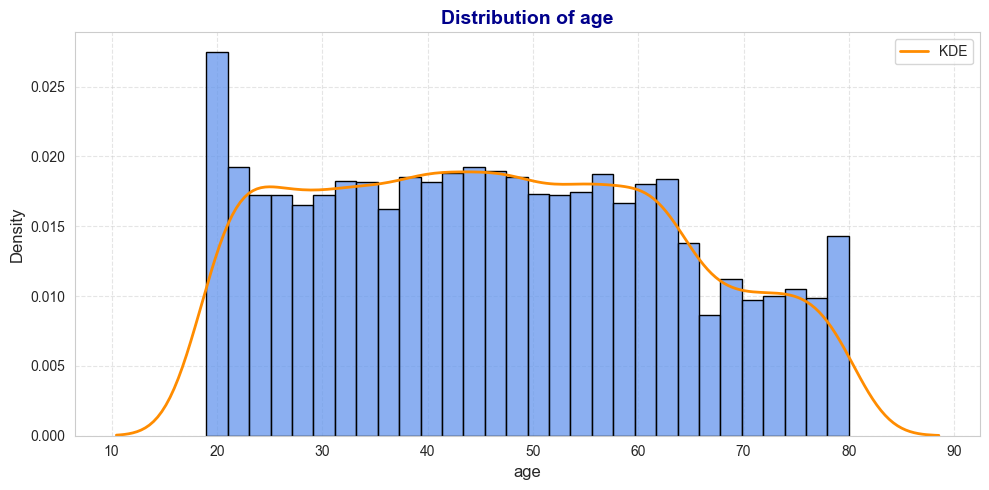

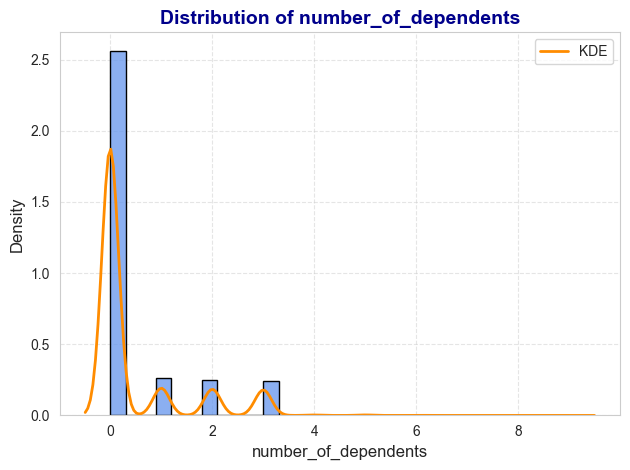

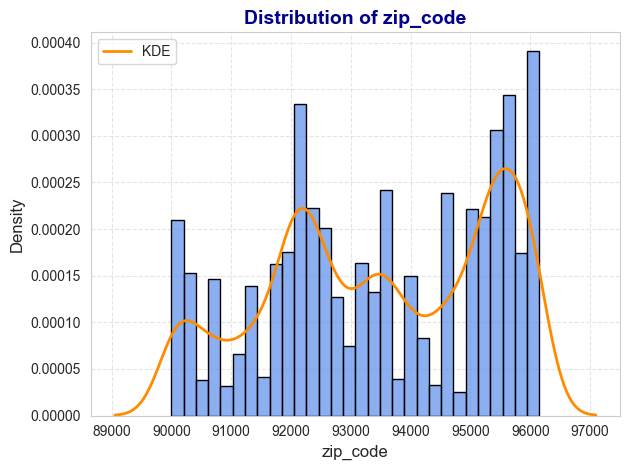

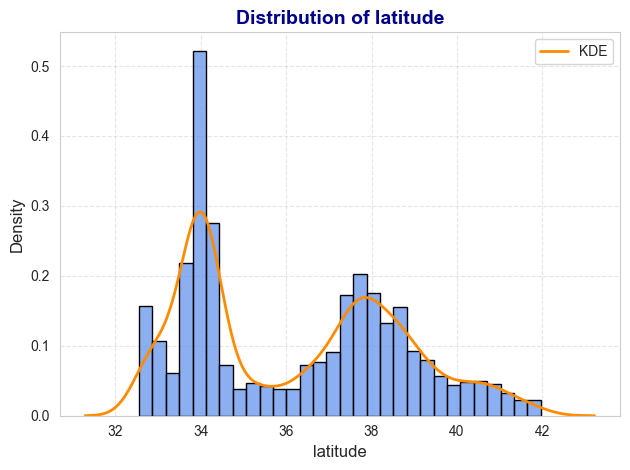

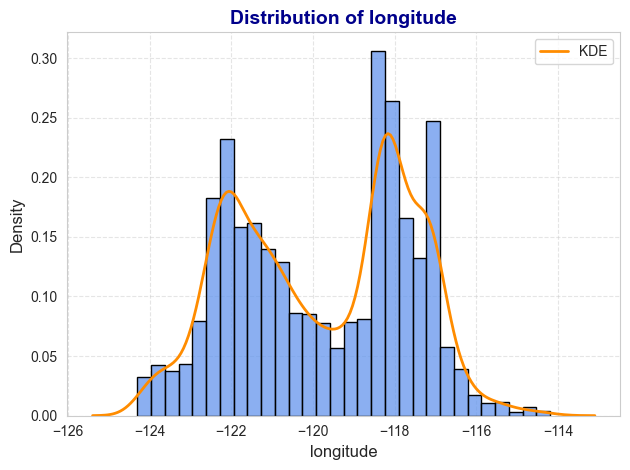

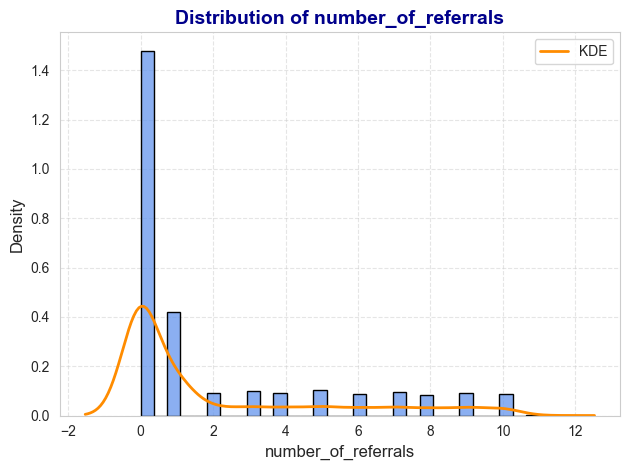

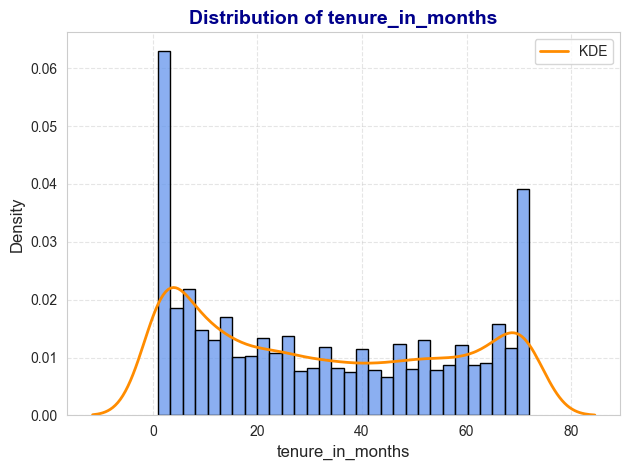

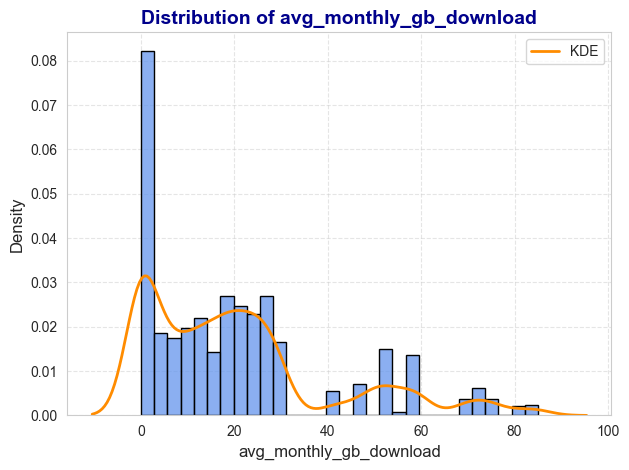

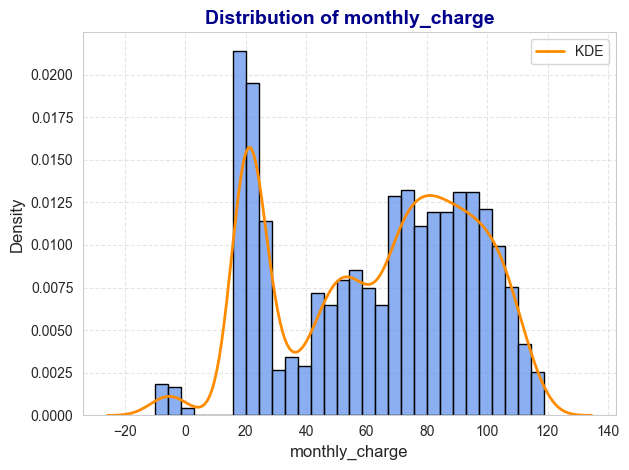

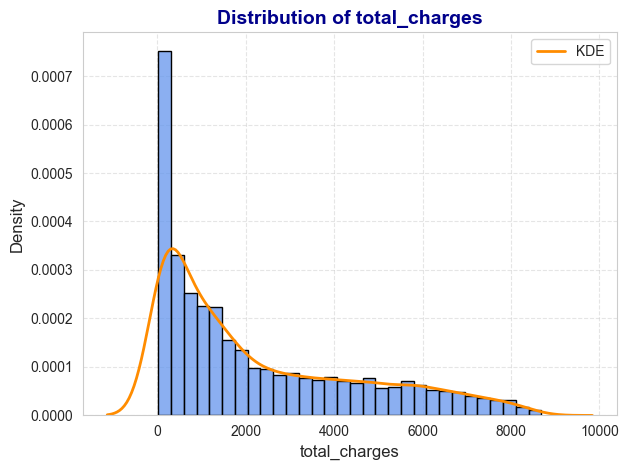

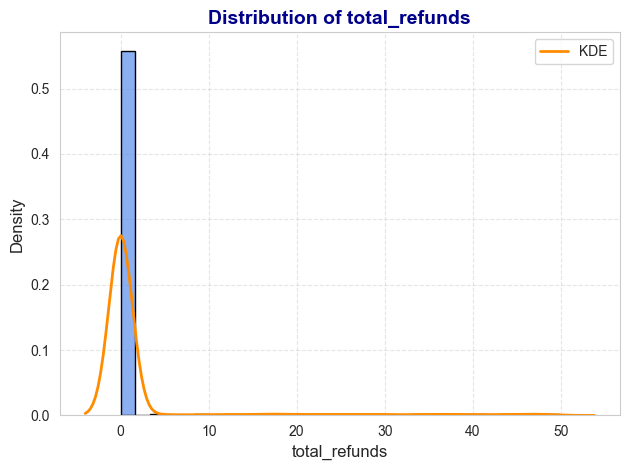

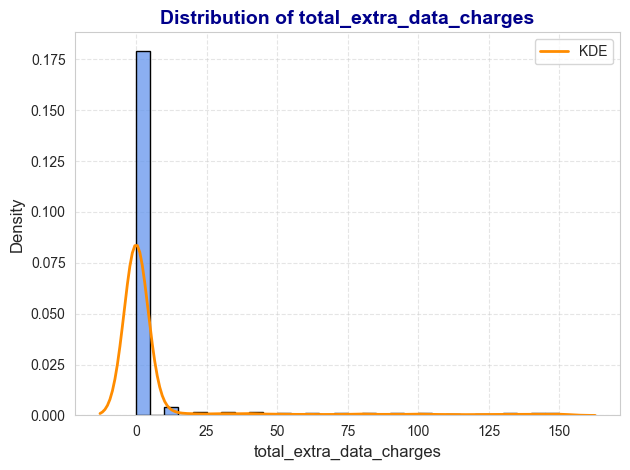

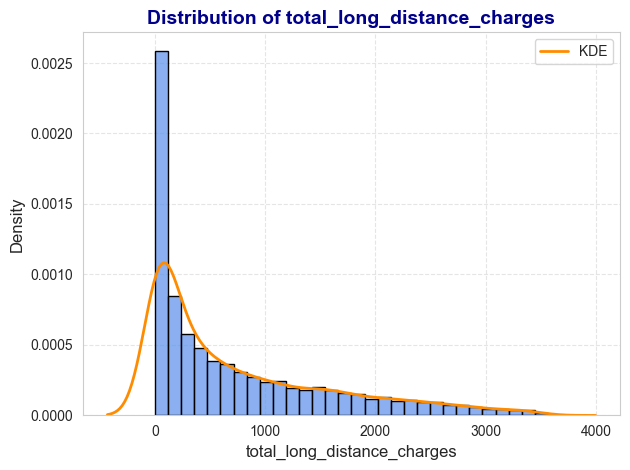

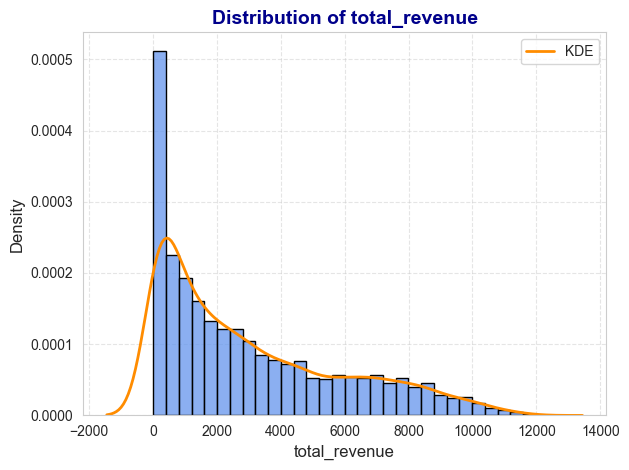

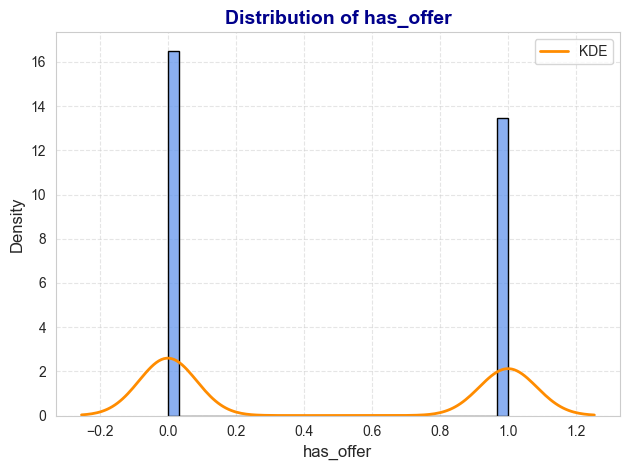

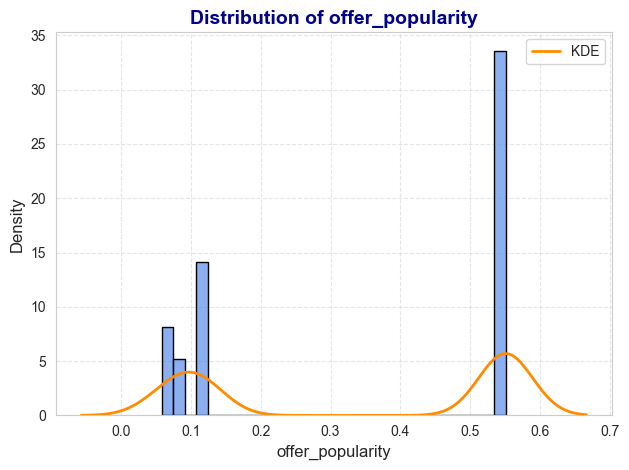

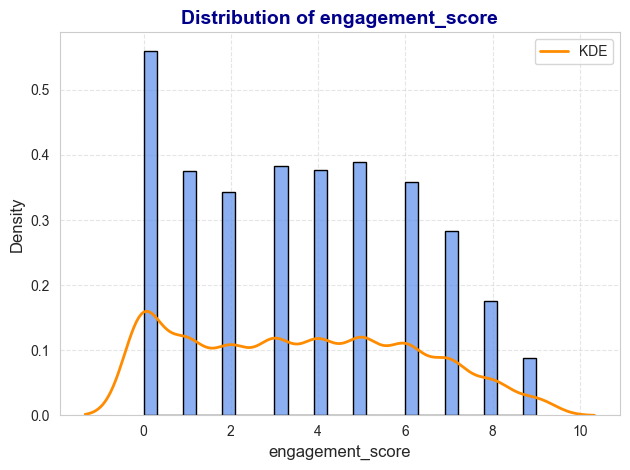

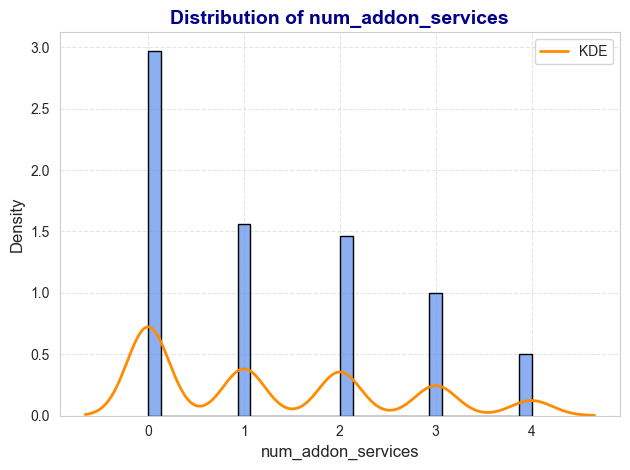

In [58]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10, 5))


for col in num_cols:

    sns.histplot(data=df, x=col, bins=30, color='cornflowerblue', edgecolor='black', stat='density')

    sns.kdeplot(data=df, x=col, color='darkorange', linewidth=2, label='KDE')

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

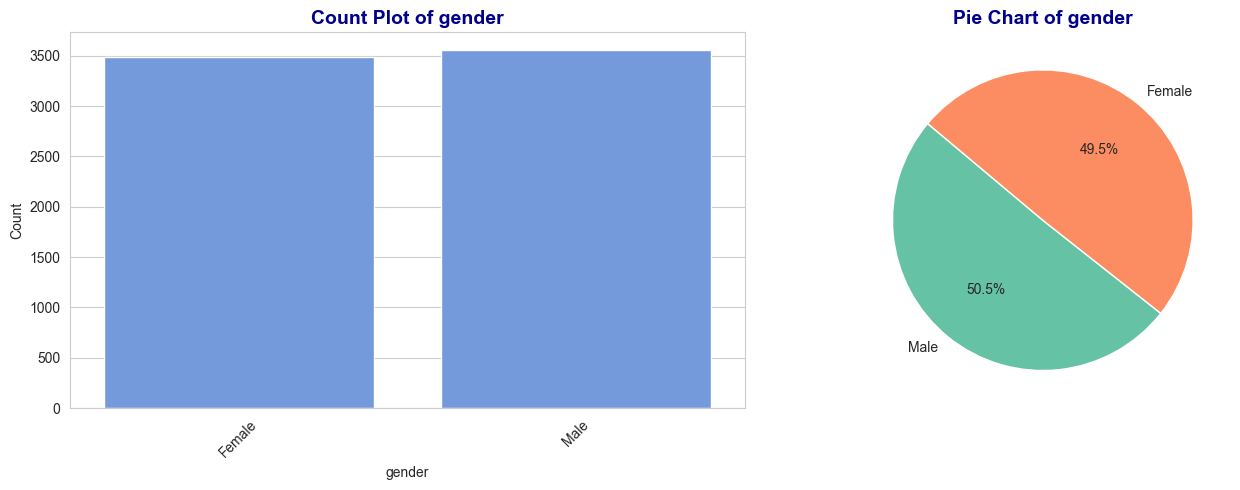

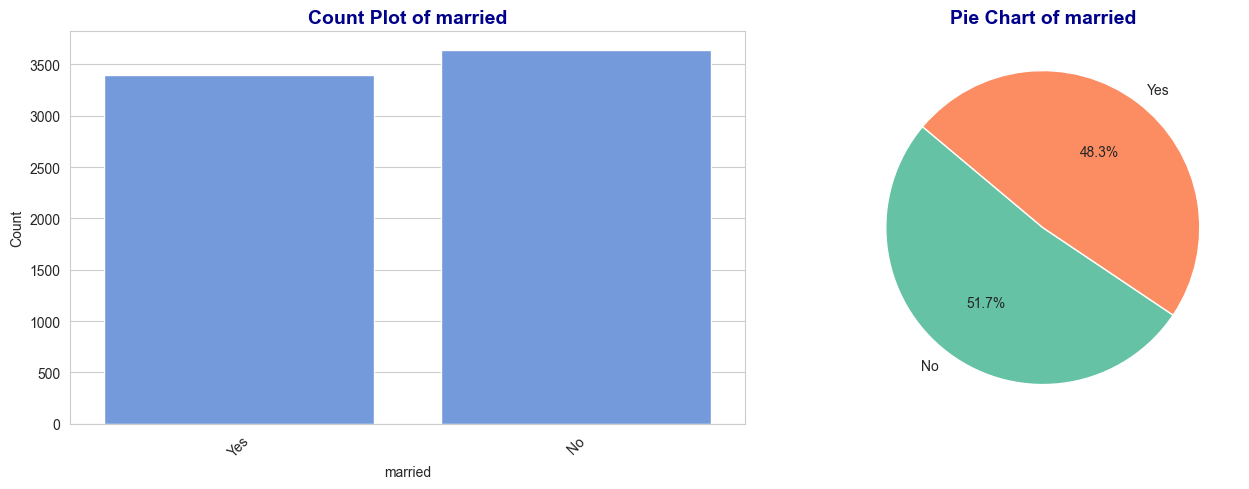

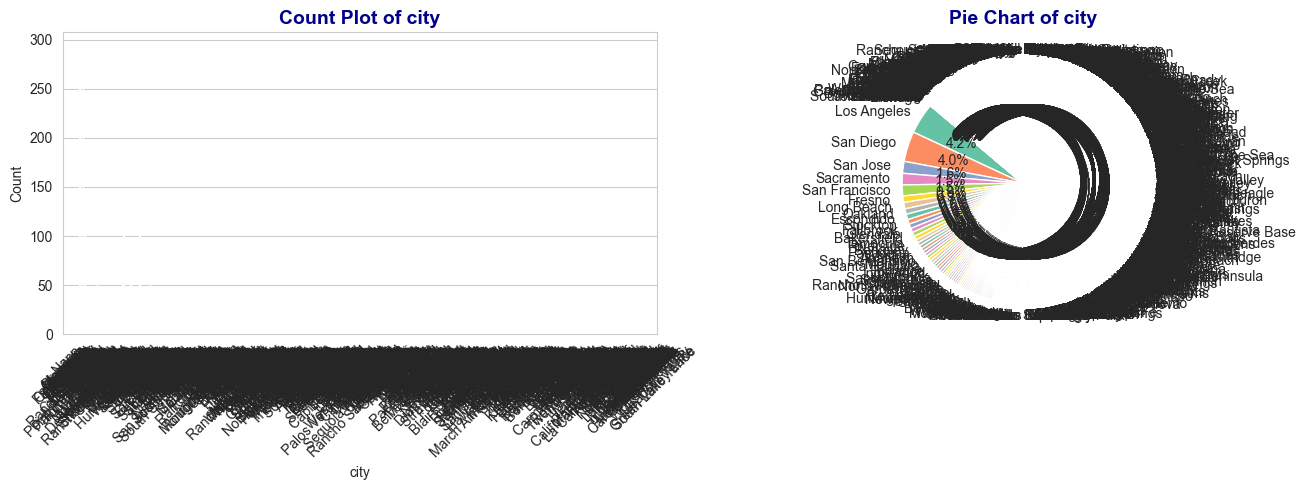

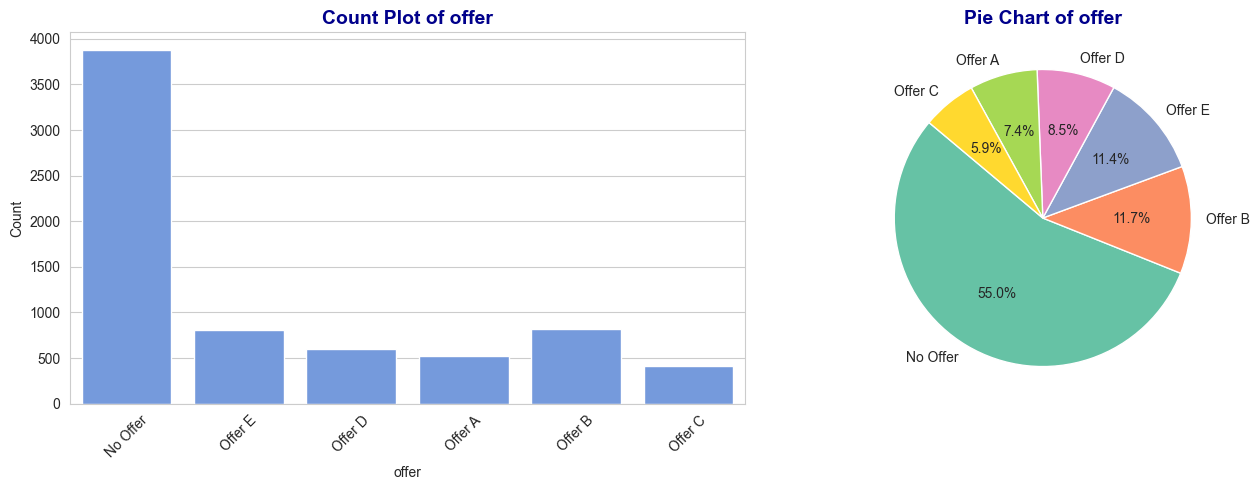

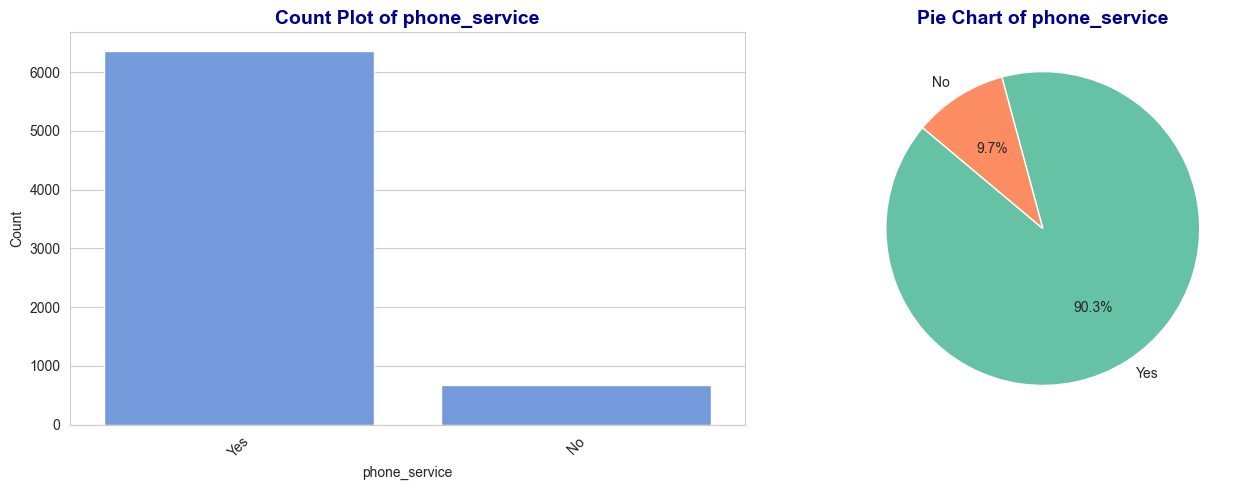

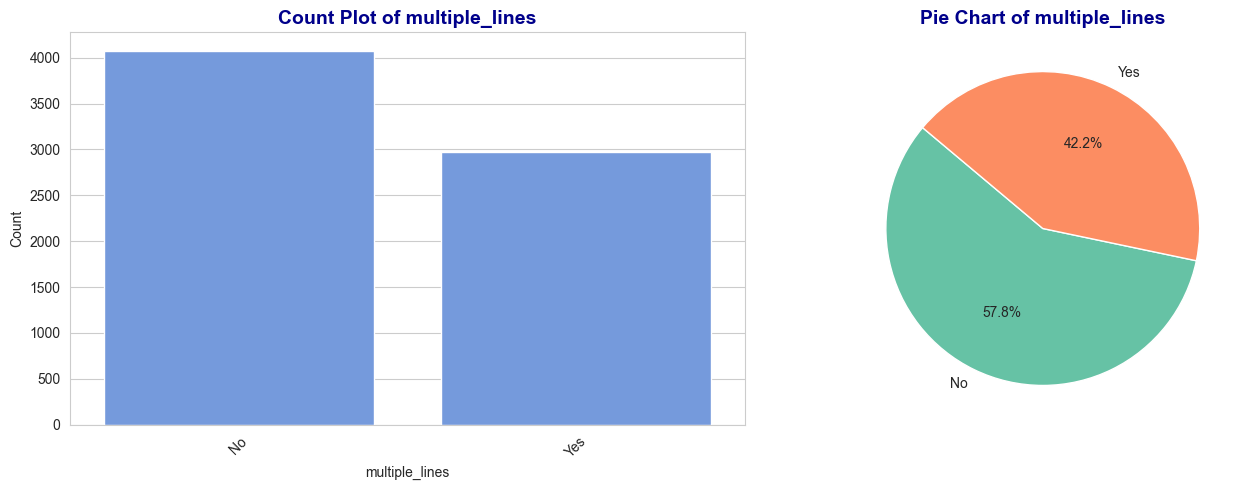

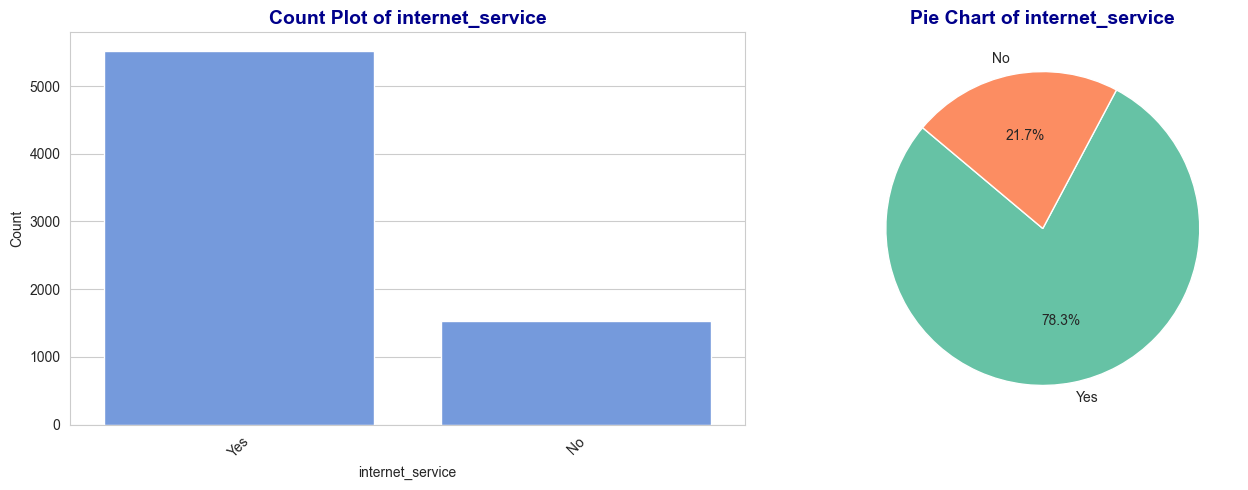

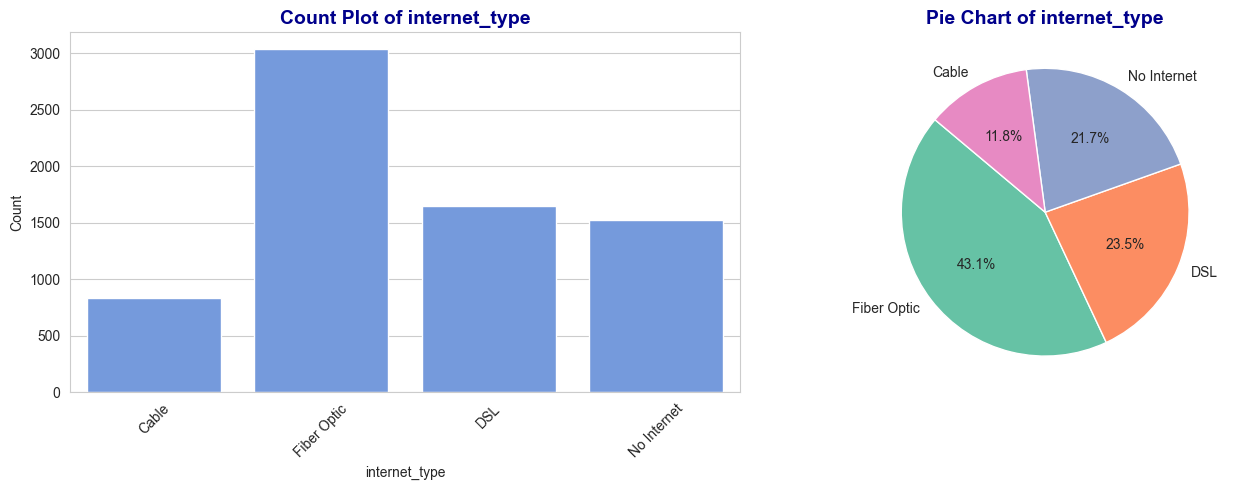

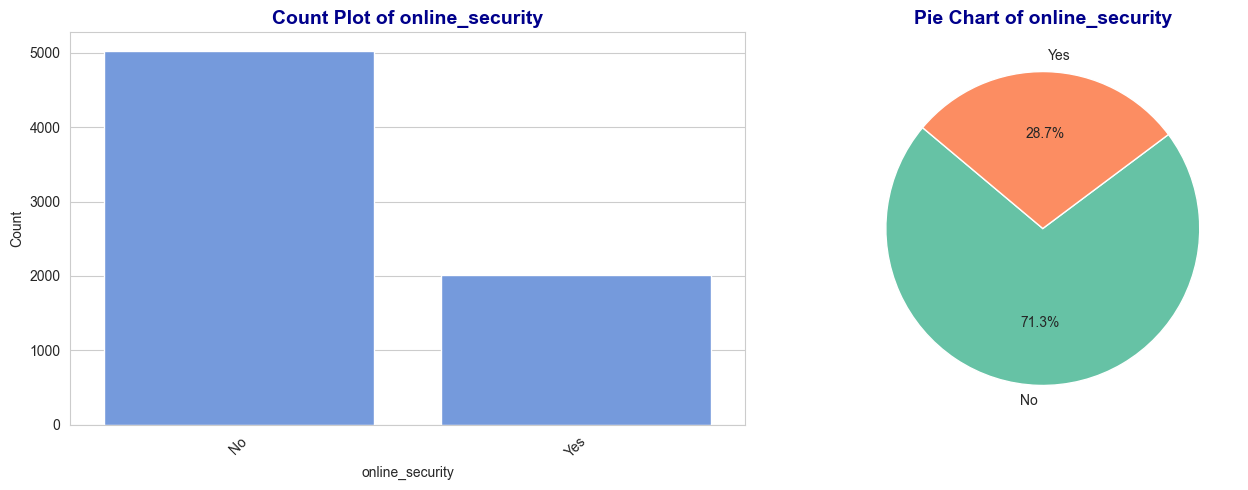

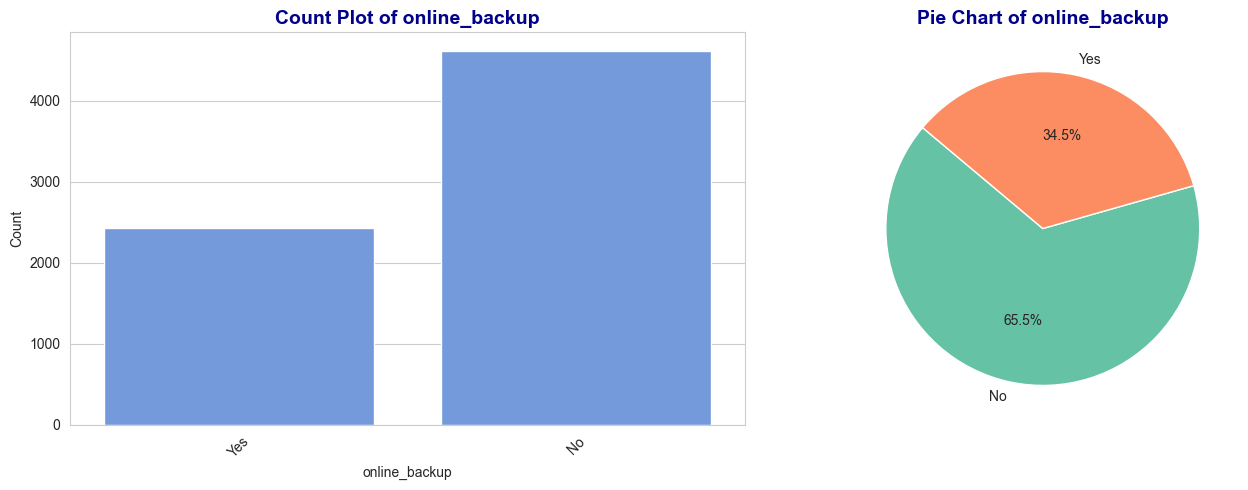

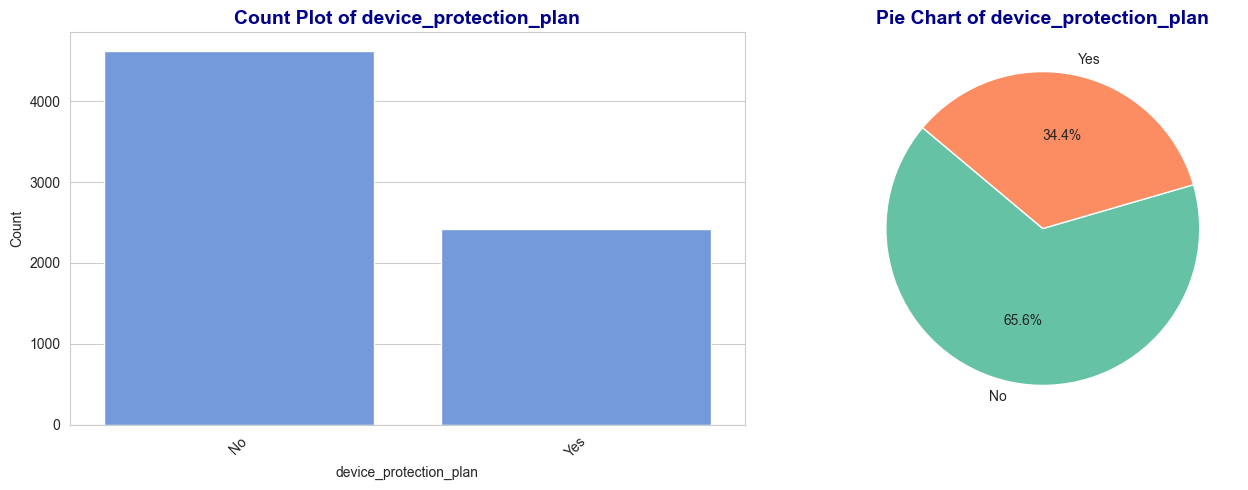

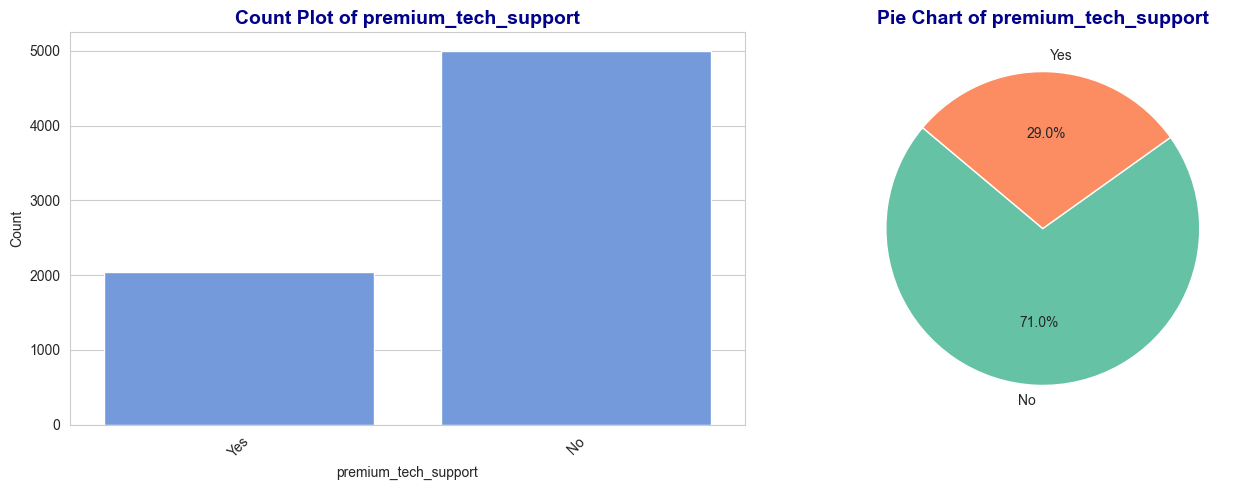

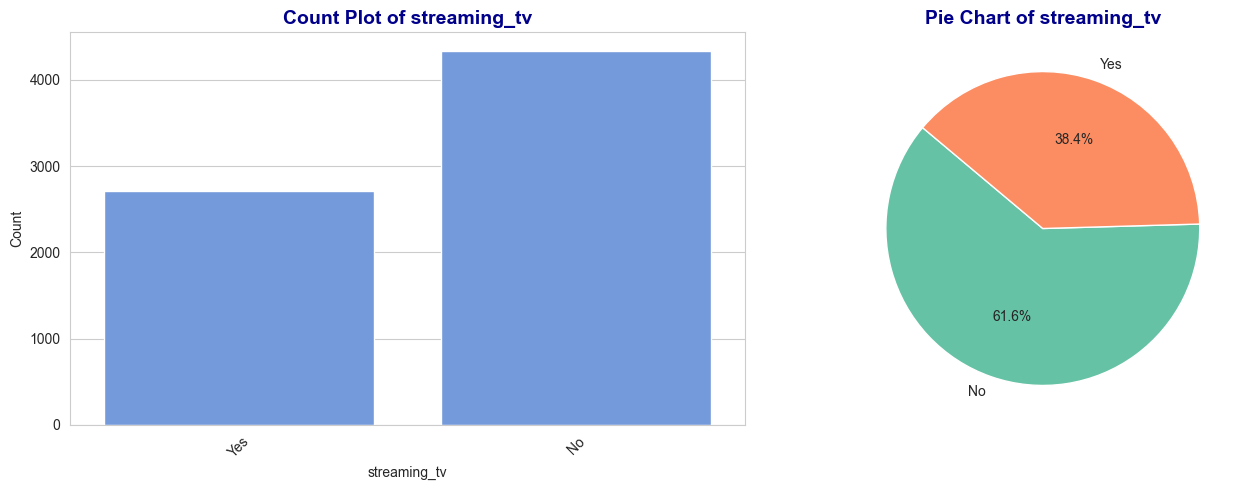

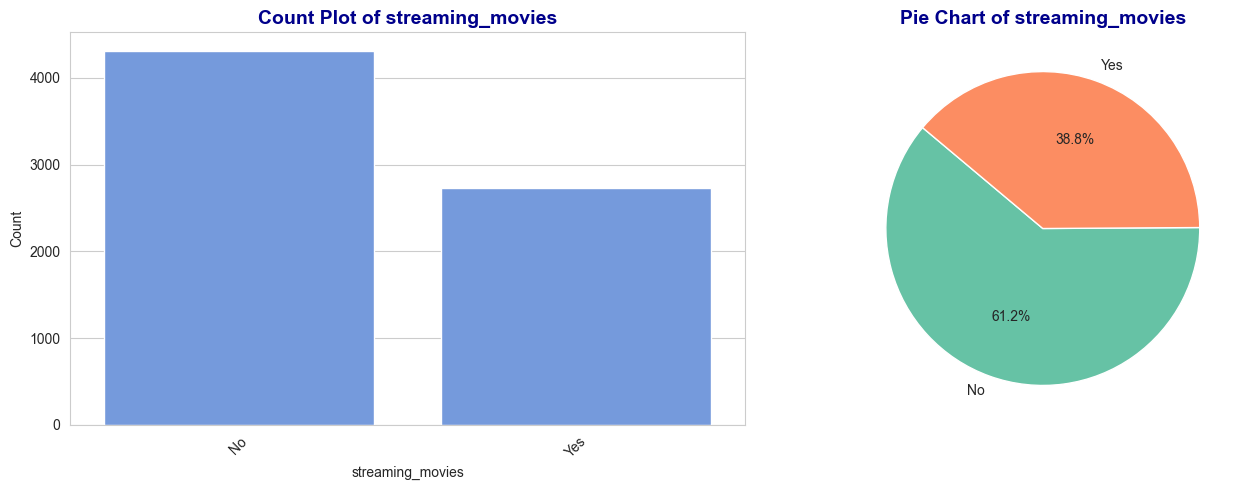

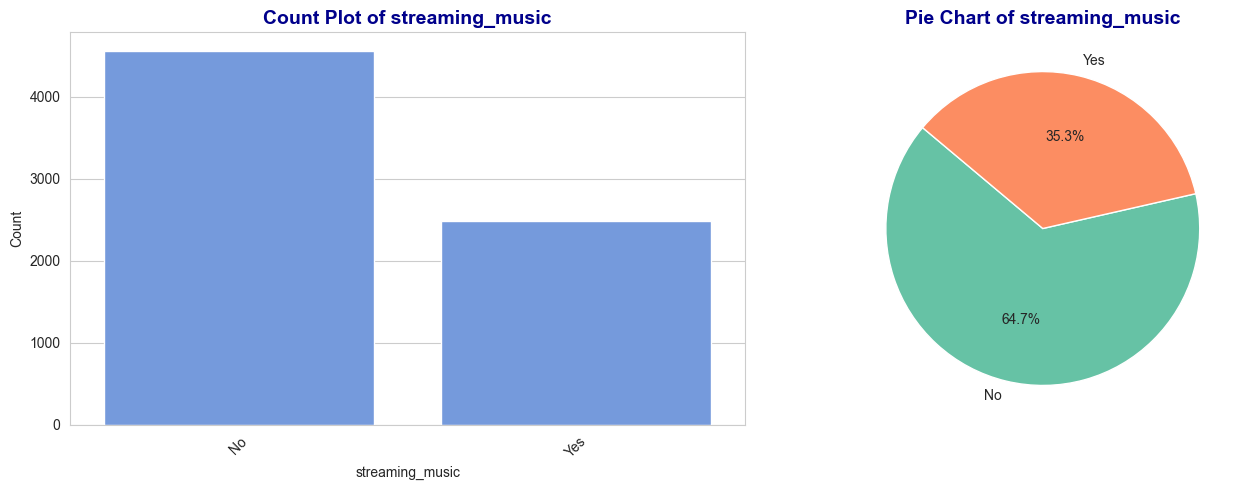

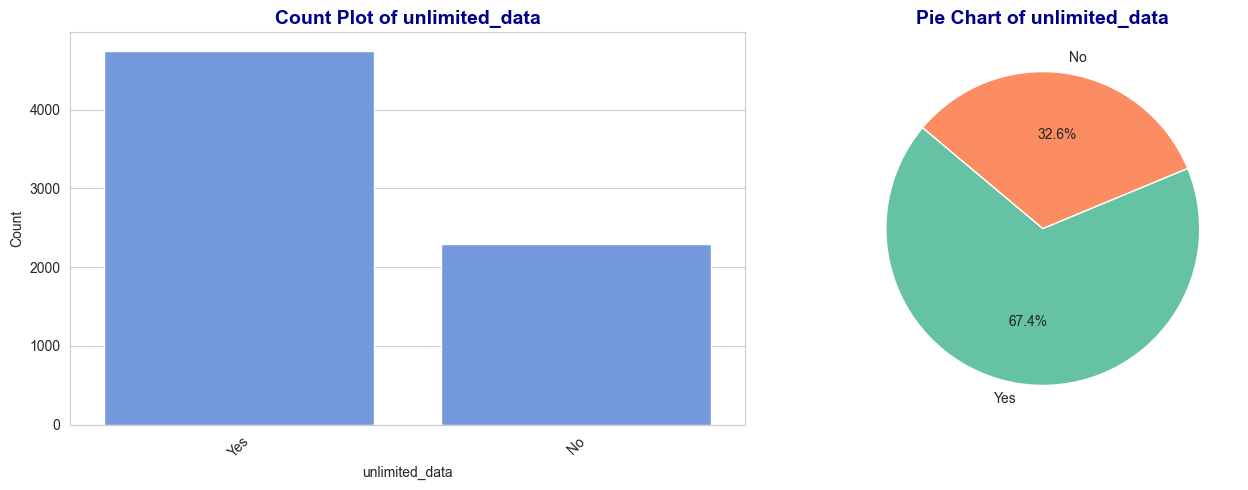

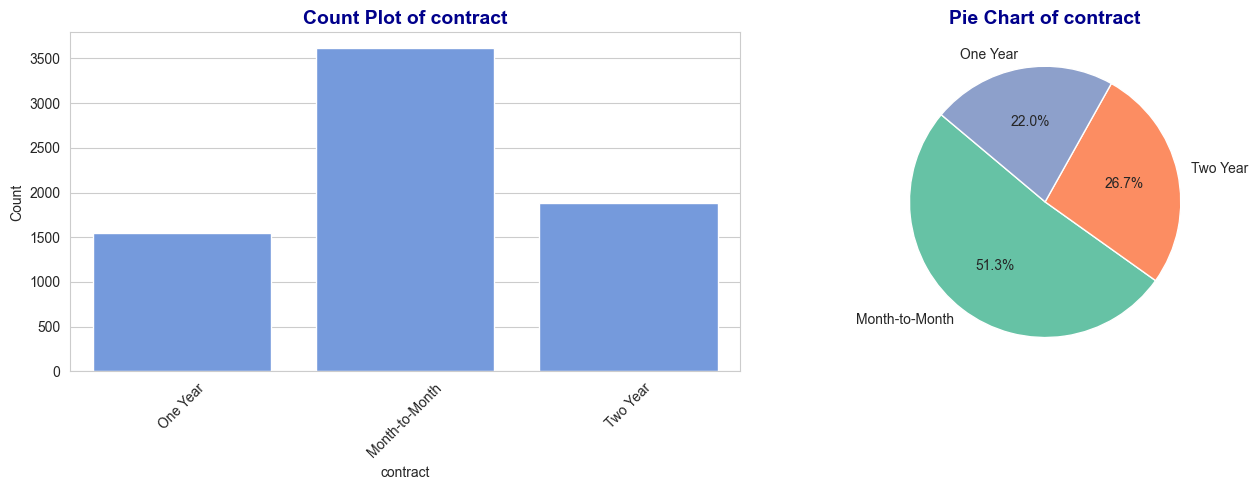

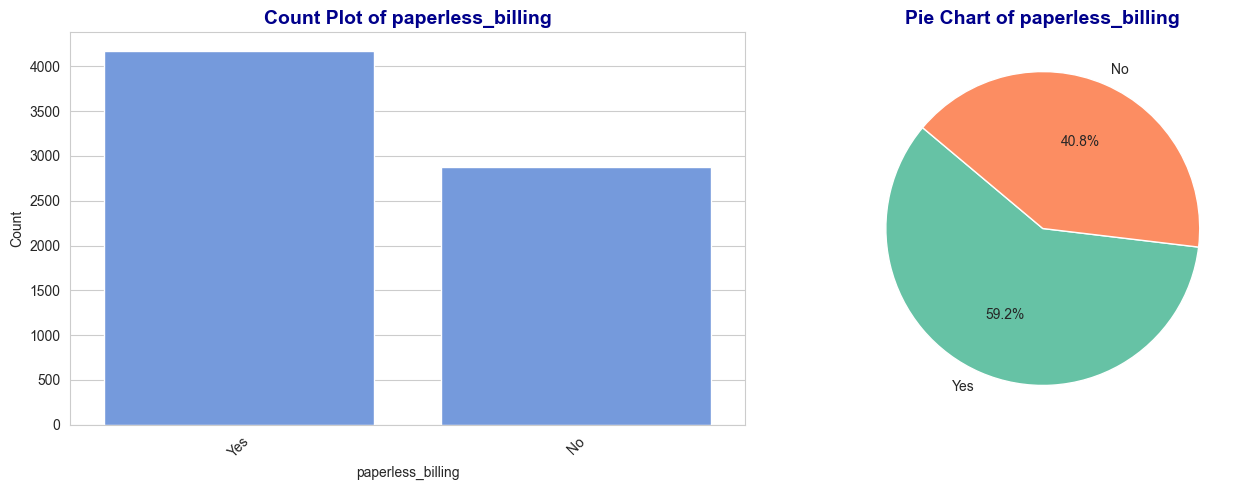

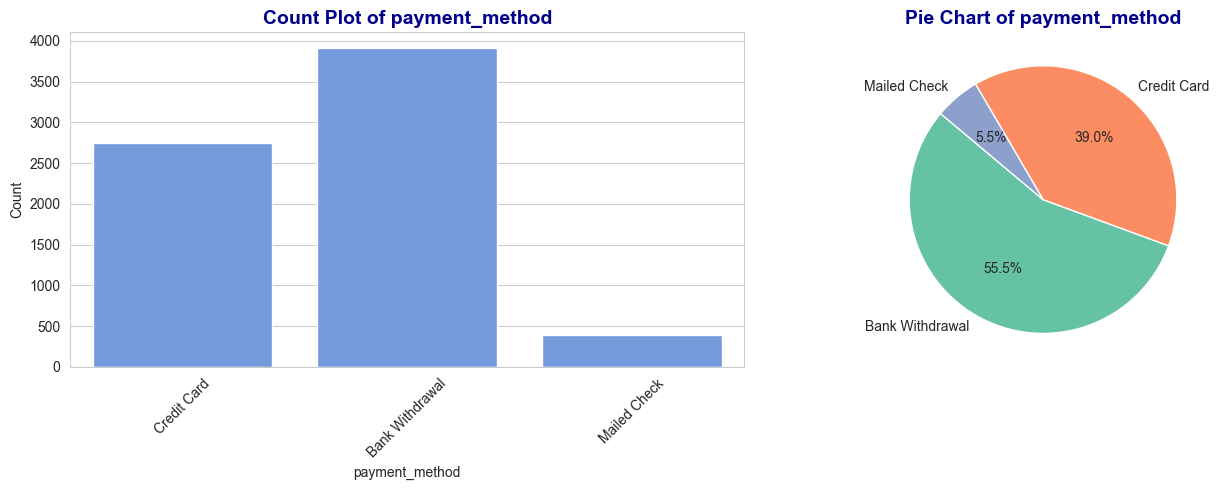

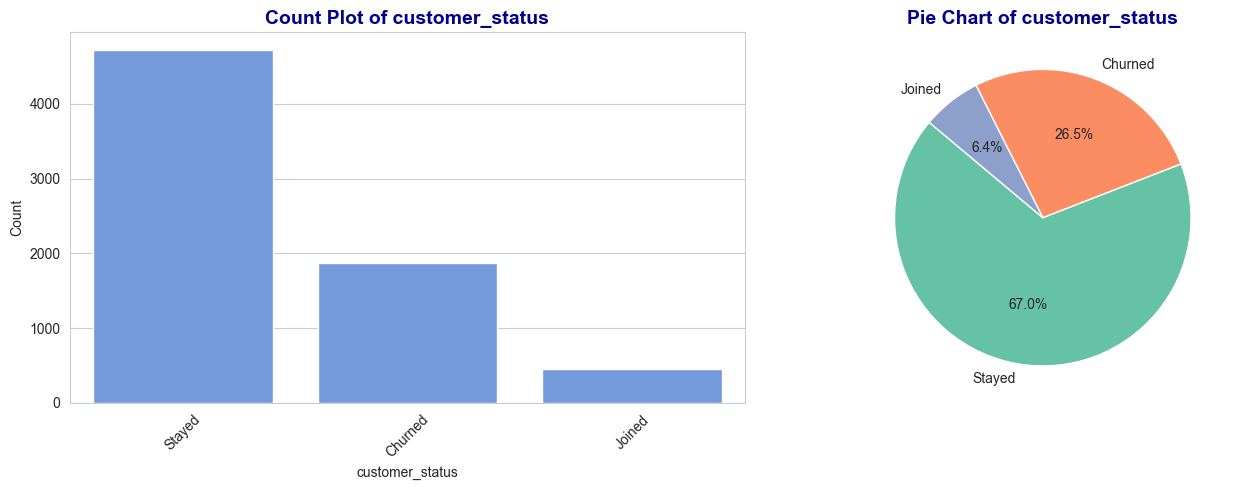

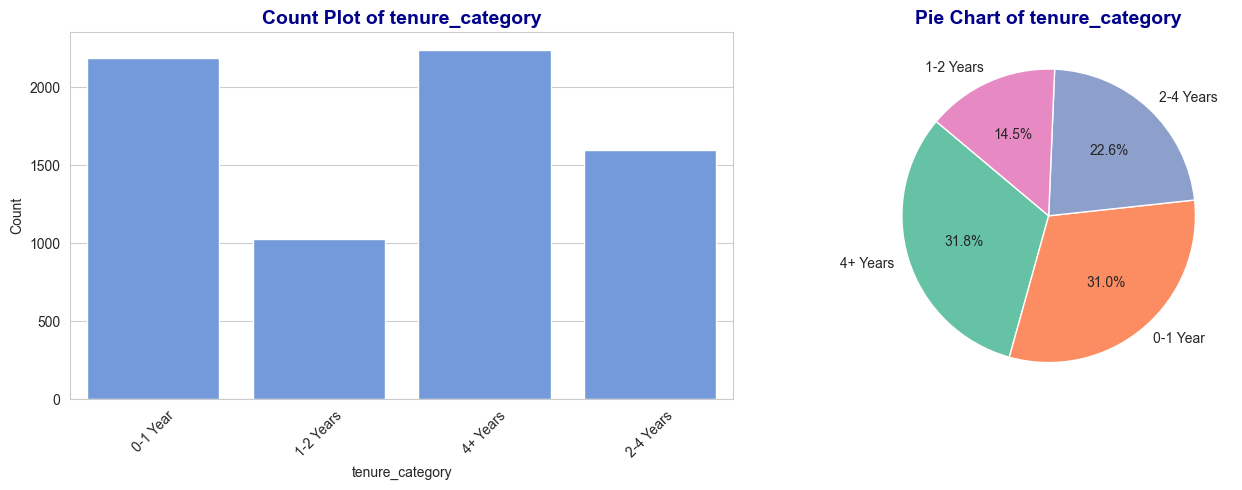

In [59]:
sns.set_style("whitegrid")
sns.set_palette("Set2")


for col in cat_cols:

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.countplot(data=df, x=col, color='cornflowerblue', ax = ax[0])
    ax[0].set_title(f'Count Plot of {col}', fontsize=14, fontweight='bold', color='darkblue')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)


    pie_data = df[col].value_counts()
    ax[1].pie(pie_data, labels = pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    ax[1].set_title(f'Pie Chart of {col}', fontsize=14, fontweight='bold', color='darkblue')


    plt.tight_layout()
    plt.show()

#### **Bivariate Analysis**

<Axes: xlabel='age', ylabel='Count'>

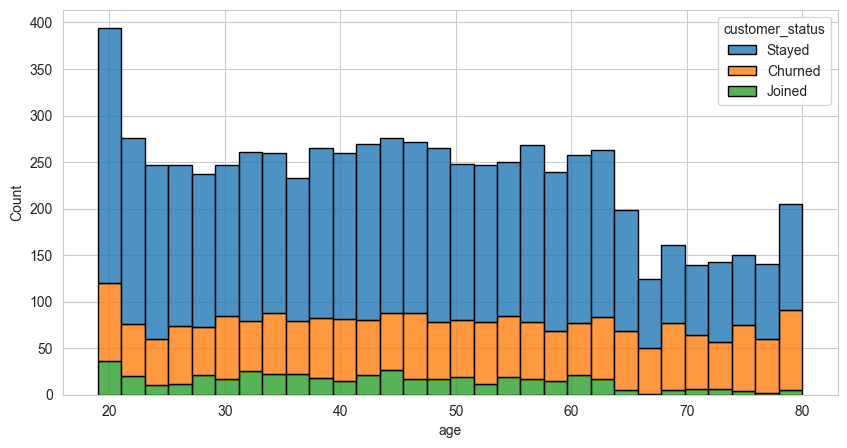

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

custom_palette = {
    'Stayed': '#1f77b4',    # Blue
    'Churned': '#ff7f0e',   # Orange
    'Joined': '#2ca02c'     # Green
}

sns.histplot(data = df, x = 'age', hue = 'customer_status', multiple='stack', palette = custom_palette, bins=30, edgecolor='black', alpha=0.8)

<Axes: xlabel='gender', ylabel='count'>

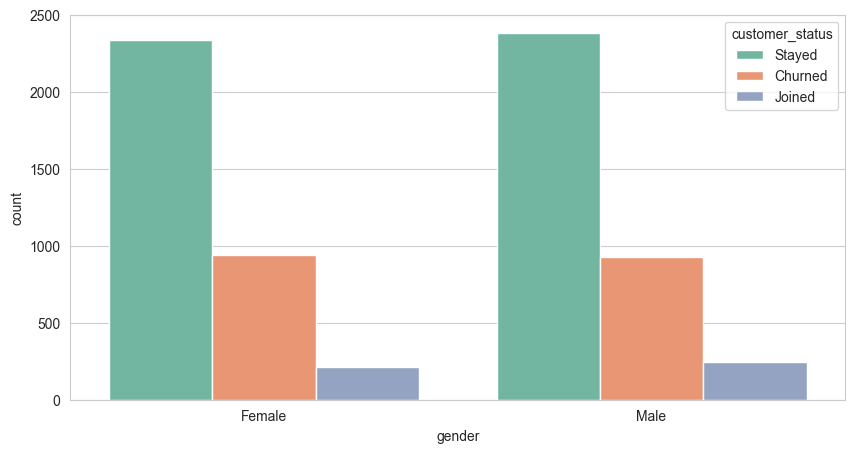

In [61]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data = df, x = 'gender', hue = 'customer_status')

<Axes: xlabel='married', ylabel='count'>

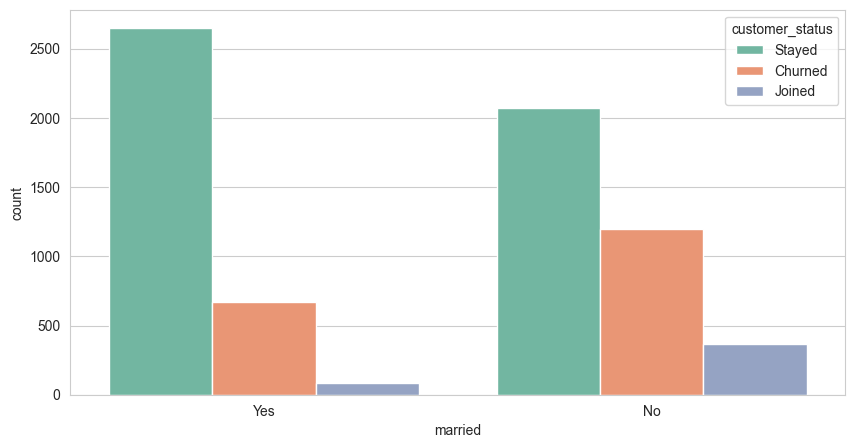

In [62]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data = df, x = 'married', hue = 'customer_status')

<Axes: xlabel='number_of_dependents', ylabel='Count'>

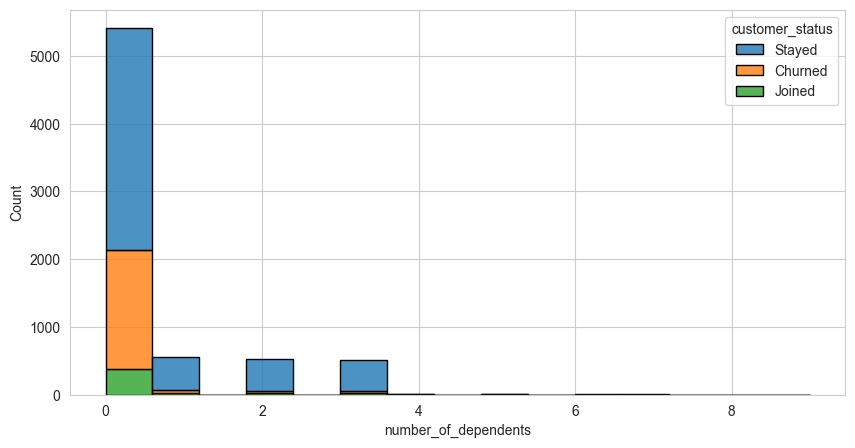

In [63]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

custom_palette = {
    'Stayed': '#1f77b4',    # Blue
    'Churned': '#ff7f0e',   # Orange
    'Joined': '#2ca02c'     # Green
}

sns.histplot(data = df, x = 'number_of_dependents', hue = 'customer_status', multiple='stack', palette = custom_palette, bins=15, edgecolor='black', alpha=0.8)

In [64]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services
6519,9251-AWQGT,Female,19,Yes,3,Palmdale,93591,34.598221,-117.795930,2,48,No Offer,Yes,9,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,20.00,935.90,0.0,0,468.96,1404.86,Stayed,0,0.550476,2-4 Years,0,False,0
6094,8631-NBHFZ,Male,71,Yes,0,Running Springs,92382,34.186211,-117.076830,1,66,No Offer,Yes,30,Yes,Yes,DSL,15.0,Yes,Yes,Yes,Yes,Yes,No,No,No,Two Year,No,Credit Card,79.40,5154.60,0.0,150,1981.98,7286.58,Churned,0,0.550476,4+ Years,7,True,4
5507,7754-IXRMC,Female,39,No,0,Atascadero,93422,35.453912,-120.694610,0,1,No Offer,Yes,12,No,Yes,DSL,14.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,45.35,45.35,0.0,0,12.46,57.81,Joined,0,0.550476,0-1 Year,1,False,0
6748,9578-FOMUK,Male,53,No,3,Santa Clara,95054,37.393554,-121.965114,0,15,No Offer,Yes,32,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,24.80,324.15,12.8,0,488.10,799.45,Stayed,0,0.550476,1-2 Years,1,False,0
1308,1941-HOSAM,Male,20,Yes,3,San Diego,92101,32.725230,-117.171346,1,1,No Offer,Yes,24,No,Yes,Fiber Optic,59.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,90.10,90.10,0.0,0,24.33,114.43,Joined,0,0.550476,0-1 Year,4,False,0
611,0895-UADGO,Male,46,No,0,River Pines,95675,38.545775,-120.743325,0,8,No Offer,No,0,No,Yes,Cable,4.0,Yes,No,No,Yes,No,Yes,Yes,Yes,Two Year,Yes,Mailed Check,44.55,343.45,0.0,0,0.00,343.45,Stayed,0,0.550476,0-1 Year,5,False,2


In [65]:
top_10_cities = df['city'].value_counts().sort_values(ascending = False).head(10).index

<Axes: xlabel='city', ylabel='count'>

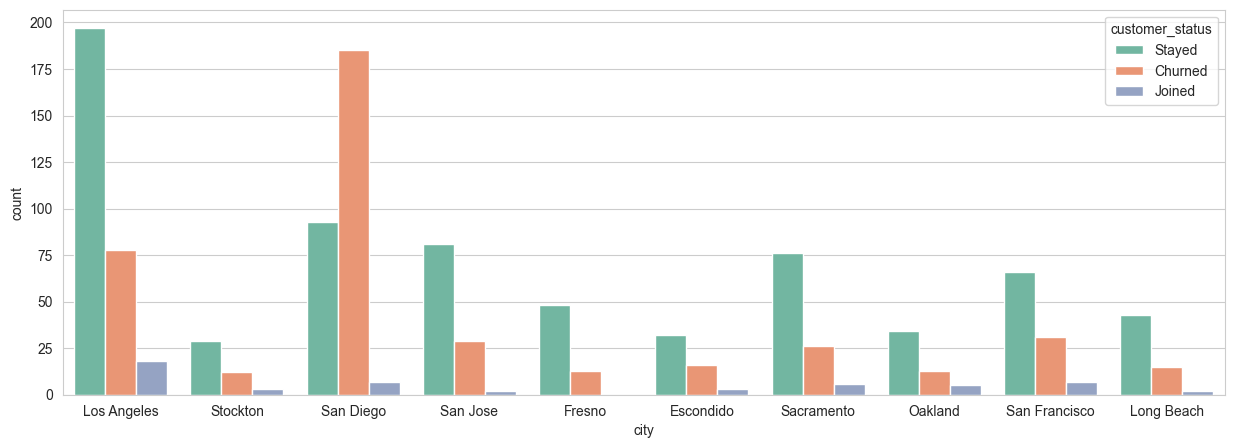

In [66]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

top_10_df_cities = df[df['city'].isin(top_10_cities)]

sns.countplot(data = top_10_df_cities, x = 'city', hue = 'customer_status')

In [67]:
churned_df = df[df['customer_status'] == 'Churned']

top_10_cities = churned_df['city'].value_counts().sort_values(ascending = False).head(10).index

Text(0.5, 1.0, 'Which city has maximum churn')

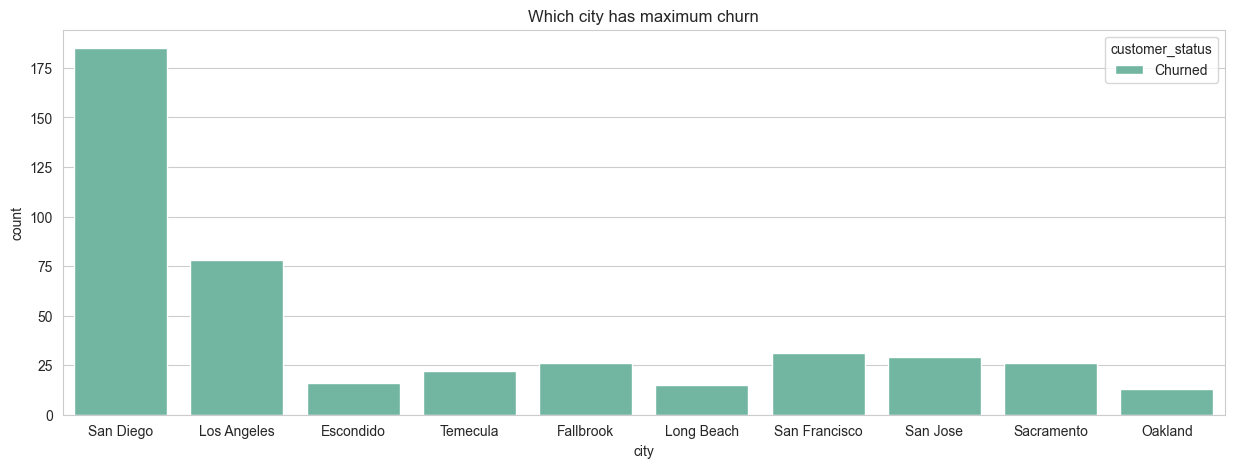

In [68]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

top_10_df_cities = churned_df[churned_df['city'].isin(top_10_cities)]

sns.countplot(data = top_10_df_cities, x = 'city', hue = 'customer_status')
plt.title("Which city has maximum churn")

In [69]:
churned_df = df[df['customer_status'] == 'Churned']

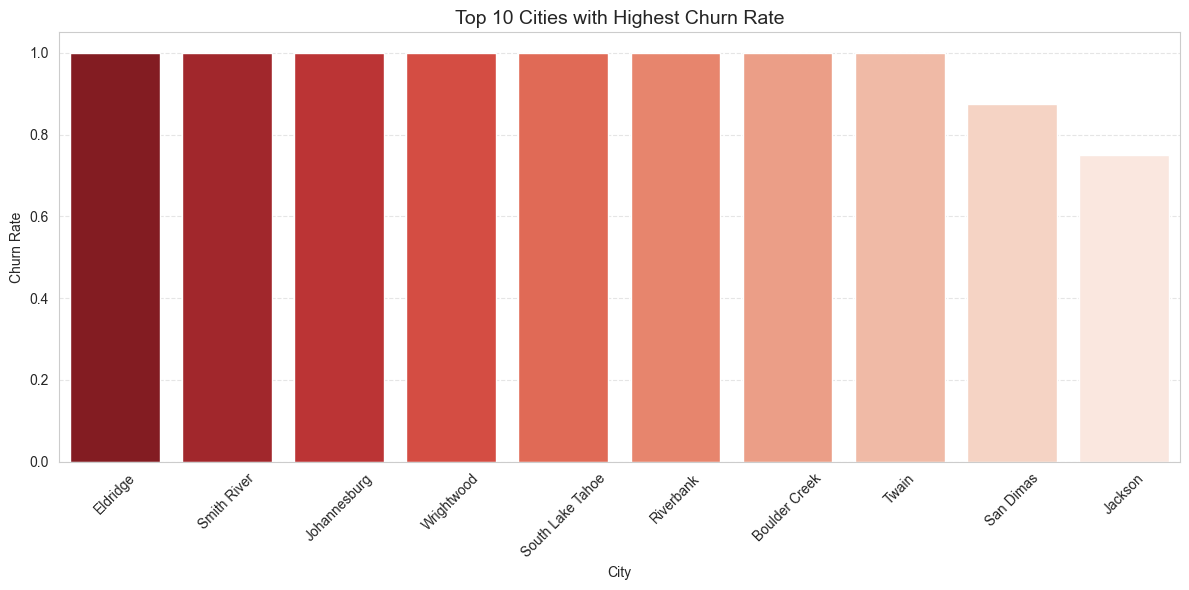

In [70]:
total_per_city = df.groupby('city').size()

churned_per_city = churned_df.groupby('city').size()

churn_rate = (churned_per_city / total_per_city).sort_values(ascending=False)

top_10_churn_rate = churn_rate.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_churn_rate.index, y=top_10_churn_rate.values, palette='Reds_r')
plt.title('Top 10 Cities with Highest Churn Rate', fontsize=14)
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [71]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services
6633,9430-FRQOC,Female,33,No,0,San Diego,92117,32.825086,-117.199424,0,4,No Offer,Yes,32,Yes,Yes,Fiber Optic,3.0,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,87.10,341.45,0.00,0,129.84,471.29,Churned,0,0.550476,0-1 Year,4,False,2
3691,5199-FPUSP,Male,64,No,2,Esparto,95627,38.834469,-122.127193,0,33,No Offer,No,0,No,Yes,Cable,12.0,Yes,No,No,Yes,No,No,No,Yes,One Year,No,Credit Card,34.05,1113.95,0.00,0,0.00,1113.95,Stayed,0,0.550476,2-4 Years,3,False,2
910,1324-NLTJE,Female,73,No,0,Emeryville,94608,37.837260,-122.287648,0,15,Offer D,Yes,17,Yes,Yes,DSL,19.0,No,No,No,Yes,No,No,No,Yes,Month-to-Month,No,Credit Card,55.00,757.10,0.00,0,257.85,1014.95,Churned,1,0.085475,1-2 Years,3,False,1
5313,7504-UWHNB,Male,42,No,0,Vallejo,94591,38.105733,-122.186338,0,25,Offer C,Yes,40,No,Yes,Fiber Optic,18.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,69.75,1729.35,0.00,100,1002.75,2832.10,Stayed,1,0.058924,2-4 Years,1,False,0
6741,9572-WUKSB,Male,22,Yes,0,South Pasadena,91030,34.110444,-118.156957,5,3,No Offer,No,0,No,Yes,DSL,41.0,No,No,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.90,92.25,0.00,0,0.00,92.25,Joined,0,0.550476,0-1 Year,2,False,1
3979,5605-XNWEN,Male,77,Yes,0,Montebello,90640,34.015217,-118.109962,0,72,No Offer,Yes,28,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,25.00,1802.55,28.93,0,2087.28,3860.90,Stayed,0,0.550476,4+ Years,1,False,0


In [72]:
df['number_of_referrals'].value_counts()

number_of_referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

In [73]:
churn_based_refral_rate = pd.crosstab(df['number_of_referrals'],df['customer_status'])

In [74]:
churn_based_refral_rate['Total'] = churn_based_refral_rate['Churned'] + churn_based_refral_rate['Joined'] + churn_based_refral_rate['Stayed']

In [75]:
churn_based_refral_rate['churn_rate']  = churn_based_refral_rate['Churned'] / churn_based_refral_rate['Total']

In [76]:
churn_based_refral_rate

customer_status,Churned,Joined,Stayed,Total,churn_rate
number_of_referrals,,,,,
0,1245,373,2203,3821,0.325831
1,507,15,564,1086,0.466851
2,26,7,203,236,0.110169
3,32,8,215,255,0.125490
4,18,3,215,236,0.076271
5,21,9,234,264,0.079545
6,8,7,206,221,0.036199
7,6,5,237,248,0.024194
8,2,7,204,213,0.009390


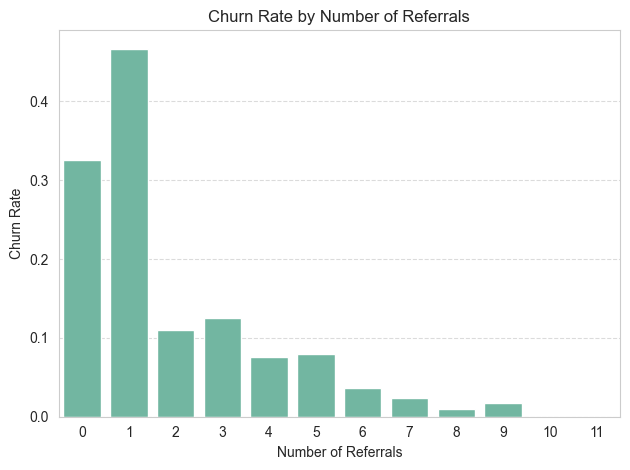

In [77]:
sns.barplot(churn_based_refral_rate['churn_rate'])

plt.title('Churn Rate by Number of Referrals')
plt.ylabel("Churn Rate")
plt.xlabel("Number of Referrals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [78]:
df['tenure_in_months'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42], dtype=int64)

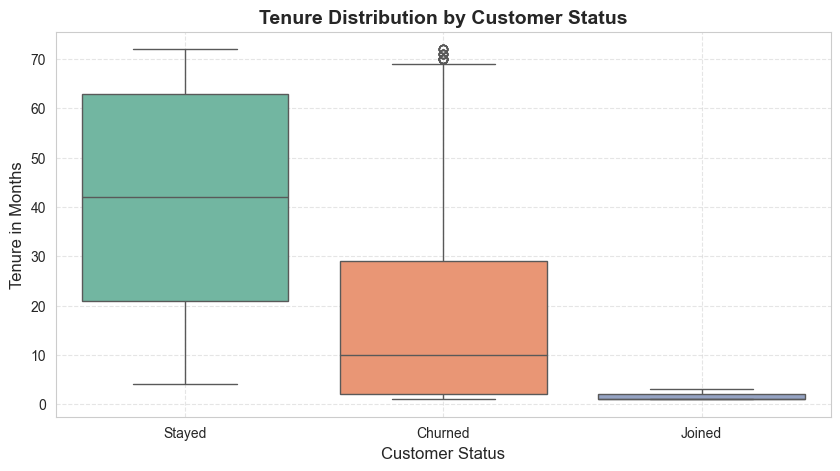

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='customer_status', y='tenure_in_months', palette='Set2')
plt.title("Tenure Distribution by Customer Status", fontsize=14, fontweight='bold')
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Tenure in Months", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

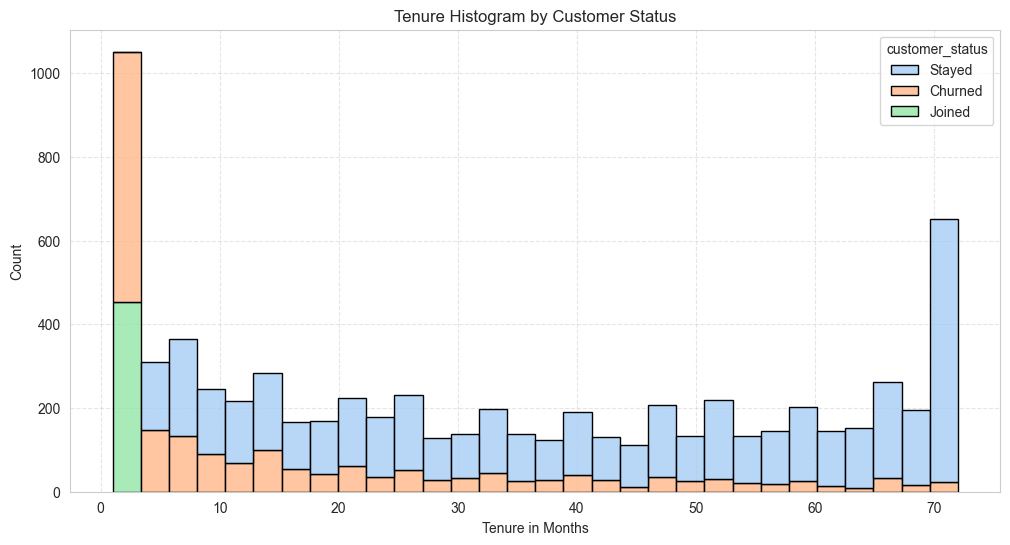

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure_in_months', hue='customer_status', multiple='stack', bins=30, palette='pastel', edgecolor='black')
plt.title("Tenure Histogram by Customer Status")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [81]:
pd.crosstab(df['has_offer'], df['customer_status'])

customer_status,Churned,Joined,Stayed
has_offer,,,
0,1051,279,2547
1,818,175,2173


<Axes: xlabel='has_offer', ylabel='count'>

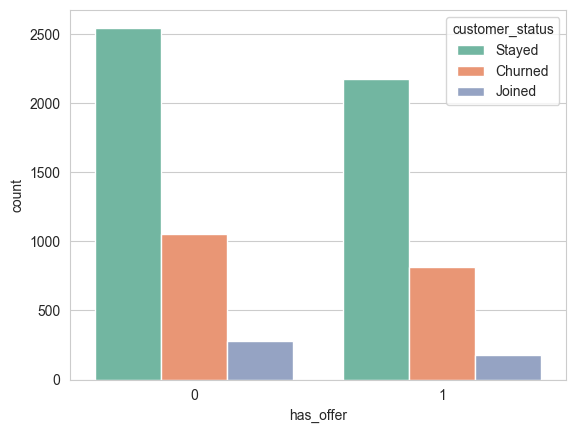

In [82]:
sns.countplot(data = df, x = 'has_offer', hue = 'customer_status')

<Axes: xlabel='avg_monthly_long_distance_charges'>

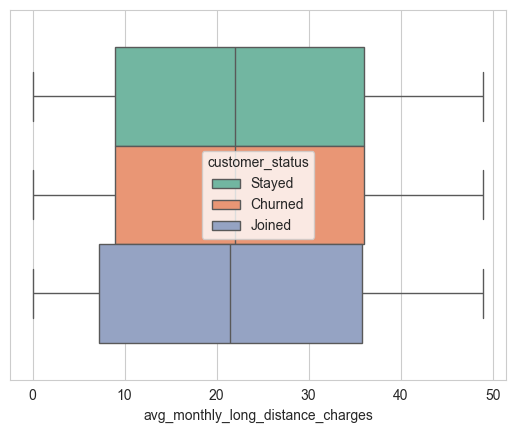

In [83]:
sns.boxplot(data = df, x = 'avg_monthly_long_distance_charges', hue = 'customer_status')

In [84]:
pd.crosstab(df['internet_service'], df['customer_status'])

customer_status,Churned,Joined,Stayed
internet_service,,,
No,113,182,1231
Yes,1756,272,3489


<Axes: xlabel='internet_service', ylabel='count'>

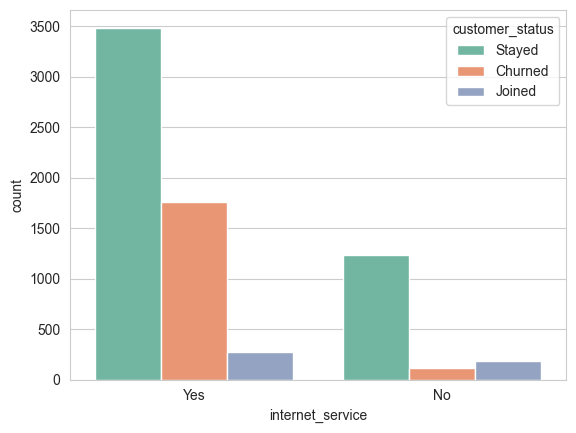

In [85]:
sns.countplot(data = df, x = 'internet_service', hue = 'customer_status')

In [86]:
pd.crosstab(df['internet_type'], df['customer_status'])

customer_status,Churned,Joined,Stayed
internet_type,,,
Cable,213,56,561
DSL,307,115,1230
Fiber Optic,1236,101,1698
No Internet,113,182,1231


<Axes: xlabel='internet_type', ylabel='count'>

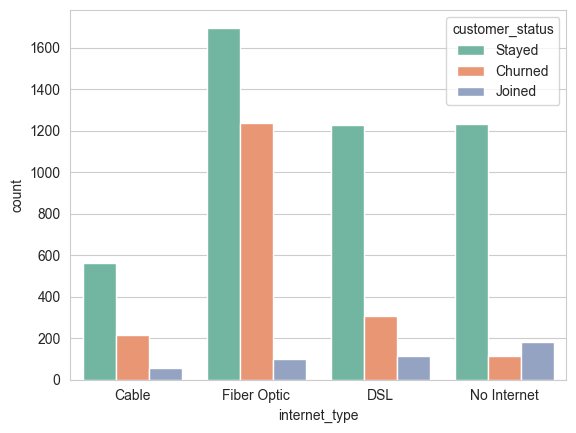

In [87]:
sns.countplot(data = df, x = 'internet_type', hue = 'customer_status')

In [88]:
sample_df = df[(df['internet_service'] == 'Yes') & (df['unlimited_data'] == 'Yes')]

<Axes: xlabel='avg_monthly_gb_download', ylabel='customer_status'>

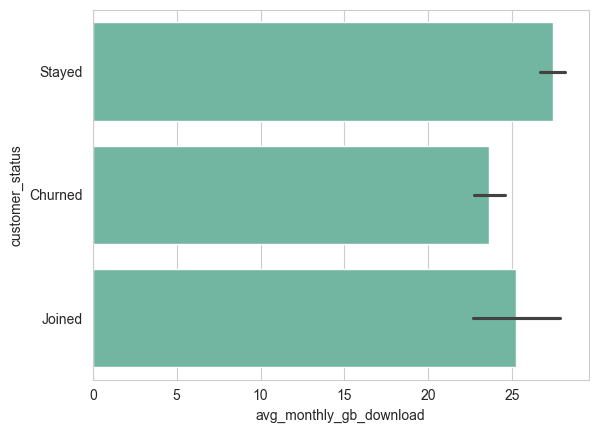

In [89]:
sns.barplot(data = sample_df, x = 'avg_monthly_gb_download', y = 'customer_status')

<Axes: xlabel='contract', ylabel='count'>

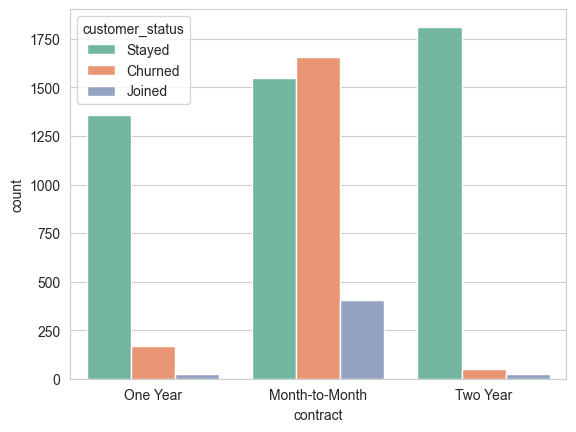

In [90]:
sns.countplot(data = df, x = 'contract', hue = 'customer_status')

<Axes: xlabel='payment_method', ylabel='count'>

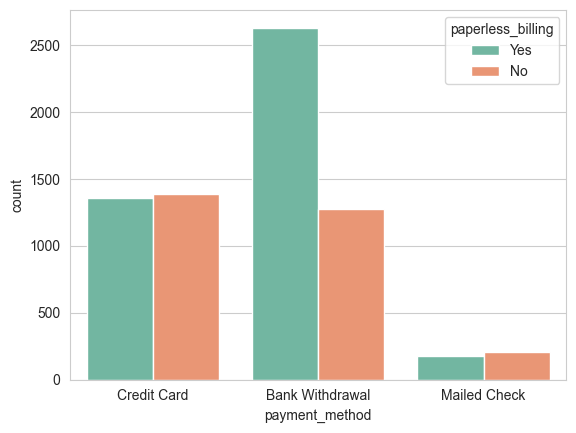

In [91]:
sns.countplot(data = df, x = 'payment_method', hue = 'paperless_billing')

<Axes: xlabel='payment_method', ylabel='count'>

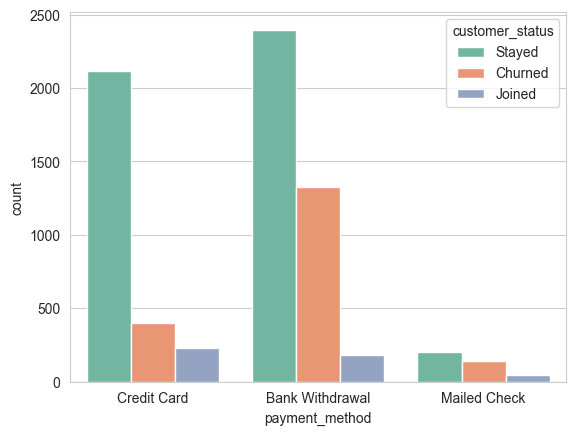

In [92]:
sns.countplot(data = df, x = 'payment_method', hue = 'customer_status')

In [93]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services
5899,8305-VHZBZ,Male,55,No,0,San Diego,92154,32.578103,-117.012975,0,1,No Offer,Yes,13,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Mailed Check,20.20,20.20,0.00,0,13.27,33.47,Churned,0,0.550476,0-1 Year,0,False,0
700,1032-MAELW,Female,57,Yes,3,Fresno,93703,36.768774,-119.762633,8,68,No Offer,Yes,7,Yes,Yes,DSL,29.0,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,78.45,5333.35,0.00,0,507.96,5841.31,Stayed,0,0.550476,4+ Years,8,True,4
2633,3745-HRPHI,Male,49,Yes,3,Yuba City,95993,39.075694,-121.706060,0,66,No Offer,No,0,No,Yes,DSL,28.0,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,54.65,3632.00,46.75,0,0.00,3585.25,Stayed,0,0.550476,4+ Years,6,False,2
2884,4112-LUEIZ,Male,55,No,0,La Palma,90623,33.850504,-118.039892,0,10,Offer D,Yes,12,No,Yes,Fiber Optic,2.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,89.50,863.10,0.00,0,127.80,990.90,Churned,1,0.085475,0-1 Year,4,False,0
1332,1982-FEBTD,Female,27,Yes,2,Newport Beach,92660,33.634626,-117.874882,1,23,No Offer,Yes,25,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,Yes,Credit Card,25.60,514.75,0.00,0,587.42,1102.17,Stayed,0,0.550476,1-2 Years,1,False,0
4662,6581-NQCBA,Female,36,Yes,0,Snelling,95369,37.521708,-120.426843,1,16,Offer D,No,0,No,Yes,DSL,29.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,49.95,810.20,0.00,0,0.00,810.20,Churned,1,0.085475,1-2 Years,5,False,1


In [94]:
df['has_extra_internet_charges'] = df['total_extra_data_charges'].apply(lambda x: 1 if x > 0 else 0)

<Axes: xlabel='has_extra_internet_charges', ylabel='count'>

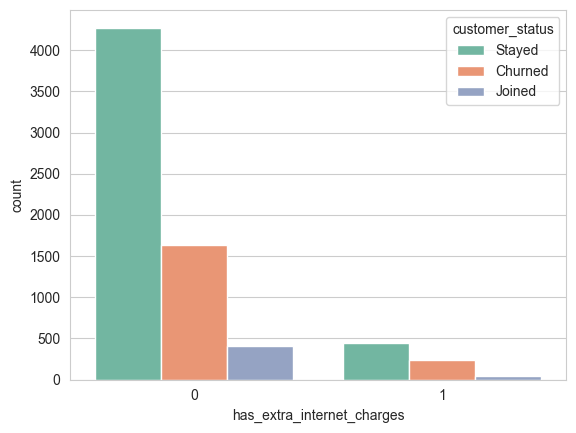

In [95]:
sns.countplot(data = df, x = 'has_extra_internet_charges', hue = 'customer_status')

<Axes: ylabel='offer_popularity'>

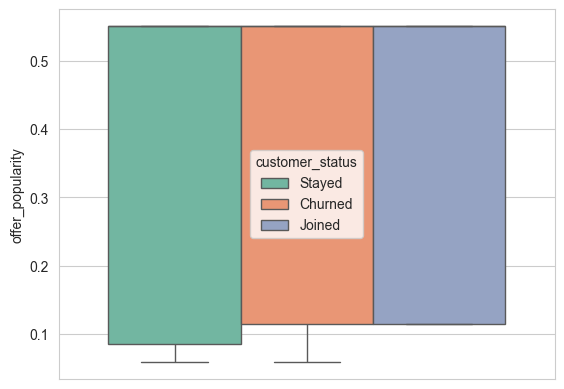

In [96]:
sns.boxplot(data = df, y = 'offer_popularity', hue = 'customer_status')

<Axes: xlabel='has_offer', ylabel='count'>

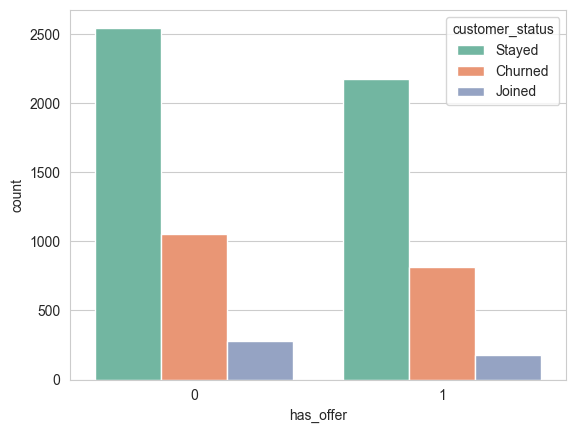

In [97]:
sns.countplot(data = df, x = 'has_offer', hue = 'customer_status')

In [98]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services,has_extra_internet_charges
4669,6585-WCEWR,Male,24,Yes,1,Fresno,93728,36.757345,-119.818274,1,72,No Offer,Yes,22,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,20.35,1354.40,0.0,0,1640.16,2994.56,Stayed,0,0.550476,4+ Years,0,False,0,0
3758,5295-PCJOO,Male,44,No,2,Long Beach,90805,33.864622,-118.179626,0,4,No Offer,Yes,9,No,Yes,Cable,16.0,Yes,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,49.40,184.40,0.0,10,39.08,233.48,Churned,0,0.550476,0-1 Year,2,False,1,1
1071,1563-IWQEX,Female,43,No,0,Chula Vista,91913,32.641640,-116.985026,0,12,No Offer,Yes,18,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,19.70,220.35,0.0,0,224.52,444.87,Stayed,0,0.550476,0-1 Year,0,False,0,0
2042,2937-FTHUR,Female,45,No,3,Cedar Glen,92321,34.255203,-117.175654,0,18,Offer D,Yes,42,Yes,Yes,DSL,28.0,Yes,No,No,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,64.80,1166.70,0.0,0,764.10,1930.80,Stayed,1,0.085475,1-2 Years,5,False,1,0
6529,9269-CQOOL,Male,58,No,0,Trinidad,95570,41.162295,-124.027381,0,3,Offer E,Yes,2,No,Yes,DSL,17.0,No,No,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,54.70,169.45,0.0,0,8.64,178.09,Churned,1,0.114298,0-1 Year,2,False,0,0
4449,6267-DCFFZ,Female,68,Yes,0,Madeline,96119,41.042003,-120.506086,8,30,Offer C,Yes,47,Yes,Yes,Fiber Optic,27.0,No,Yes,No,No,Yes,No,No,Yes,Two Year,Yes,Bank Withdrawal,90.05,2627.20,0.0,0,1432.50,4059.70,Stayed,1,0.058924,2-4 Years,4,False,1,0


In [99]:
df['churned'] = df['customer_status'] == 'Churned'

fig = px.box(df, x='engagement_score', y='total_revenue', color='churned', title="Revenue vs Engagement by Churn")
fig.show()

In [100]:
fig = px.scatter_geo(df[df['customer_status'] == 'Churned'],
                     lat='latitude',
                     lon='longitude',
                     scope='usa',
                     color='total_revenue',
                     hover_name='city',
                     title='Churned Customers Distribution')

fig.show()

In [101]:
fig = px.scatter(df, x='num_addon_services', y='monthly_charge',
                 color='customer_status',
                 size='total_revenue',
                 title='Monthly Charges by Add-on Services and Status')

fig.show()


In [102]:
fig = px.histogram(df, x='contract', color='customer_status',
                   barmode='group', title='Churn Count by Contract Type')

fig.show()

In [ ]:
df.to_csv('../data/processed/processed_customer_churn_data.csv', index=False)